In [125]:
%run EDA_code.ipynb

# Bitcoin Accumulation Dashboard – Insight Analysis  
### * Demonstrate how the dashboard’s information meaningfully helps investors make better Bitcoin investment decisions.
### * Using dashboard features to evaluate the performance of the Dynamic DCA strategy
The Dynamic DCA strategy adopted in the dashboard, designed by Youssef Ahmed from the Georgia Institute of Technology, has achieved strong performance, with an average SPD percentile of 89.55% and a 99.41% win rate, outperforming uniform DCA. We have successfully integrated this strategy into our dashboard and further enhanced it with additional indicators, such as risk metrics, news sentiment, and the MSTR purchase signal. This allows users to allocate their budget for purchasing Bitcoin using a user-friendly interface, while also using the dashboard features to monitor performance and incorporate other information into their decision-making process.

However, evaluation metrics and numerical indicators alone can still feel somewhat abstract to users, especially beginners. Without understanding the model mechanics and the logic behind the indicators, users may not fully trust the strategy or feel confident using the dashboard features. Therefore, the goal of this analysis notebook is to use various exploratory data analysis methods, including visualizations, aggregated charts, and other comprehensive analyses, to show how well the current Bitcoin accumulation strategy actually performs, how the dashboard features can be used to evaluate the strategy’s decision-making process, and how the information provided by the dashboard can meaningfully help investors make better Bitcoin investment decisions.

---

# Summary

1.	Dynamic DCA clearly concentrates its allocations in low-price regions within each 1-year window.
2.	Dynamic DCA outperforms Uniform DCA in both total and annual BTC accumulation and achieves a lower average cost, mainly because it deploys almost all capital during historically cheap market conditions.
3.	Dynamic DCA shows higher risk metrics due to its concentrated bets. However, these large allocations occur near price bottoms, so the concentration is not a negative sign.
4.	Dynamic DCA naturally buys more during bearish markets and scales back during bullish trends.
5.	An MA200-based Bitcoin accumulation strategy generally outperforms uniform DCA.
6.	The MSTR signal tends to produce better entry points than random timing, especially within a 30-day forward window.
7.	Integrating the MSTR signal into Dynamic DCA provides only minor improvements.

# 0. Strategy Assumptions
1. Dynamic DCA's focus on Bitcoin accumulation, a buy-only approach (no selling). Its objective is to maximize total Bitcoin accumulation.
2. Dynamic DCA uses a 1-year window as its primary optimization horizon.  
    - Its objective is to maximize total Bitcoin accumulation within a single 1-year window. In other words, an investor using this strategy for one year aims to allocate capital in a way that buys more Bitcoin at relatively lower prices throughout that year, resulting in a higher total BTC balance by the end of the window.
    - This strategy does not guarantee optimal Bitcoin accumulation when the investment horizon is extended (e.g., two years or longer) or shortened, even if the same annual budget is used.
3. Dynamic DCA is designed for a fixed annual Bitcoin investment budget
    - The entire annual budget is fully deployed within each year, and a new, separate budget is reset at the beginning of the next year.

# 1. Daily Allocation Insights  
### How does the dashboard tell investors how much to buy each day? And is this allocation behavior reasonable?

## 1.1 Understanding Daily Allocation Behavior
- **Question answered:**  
**1. What does the daily recommended allocation represent?**  
**2. How does allocation change through time?**

### 1.1.1 Daily Recommended Allocation
The daily recommended allocation represents the percentage of an investor’s fixed budget that the Dynamic DCA strategy suggests deploying on each day. Higher allocations indicate stronger buy signals (typically when BTC is relatively cheap), while lower allocations indicate reduced purchasing during more expensive conditions.

### 1.1.2 What Following the Strategy Looks Like Day-to-Day
The animation shows exactly what following the strategy looks like day-to-day: as prices fall, your daily buy amount gradually increases; as prices rise, it naturally tapers off. You can visually see how your money gets deployed through market cycles.

![til](data/allocation_animation_quarterly.gif)

## 1.2 Allocation vs Price Trend
- **Question answered:**  
**1. Does the dynamic DCA strategy increase allocation when Bitcoin is cheap and reduce allocation when it is expensive?**  
**2. Does the dynamic DCA strategy automatically buy more in downturns and slow down during uptrends?** 
- Approach:
    - BTC Price and Dynamic Allocation under Non-overlapping Rolling Windows (2018–2025)
- Key Findings:
    - Dynamic DCA truly concentrates its allocations at low-price regions in 1-year windows.

First, let’s look at this in the most intuitive way. We want to see whether the core investment strategy shown in the dashboard, the dynamic DCA strategy that tells you how much budget to allocate for buying BTC each day, truly increases allocation when the price is low and decreases allocation when the price is high.  

### 1.2.1 BTC Price and Dynamic DCA Allocation under Non-overlapping 1-year Rolling Windows (2018–2025)
Since the evaluation metric of this model is to maximize the SPD Percentile of a 1-year rolling window, we are essentially asking whether, within each one-year period, the strategy helps you buy as much Bitcoin as possible given a fixed budget. So we then look further at each year from 2018 to 2025 and check whether this strategy consistently increases allocation at local lows and cuts back at local highs.

I created a combined chart that overlays the BTC price line with allocation weight bars. This lets us look more closely at each year from 2018 to 2025 and check whether the strategy consistently increases allocation at local lows and cuts back at local highs.  

Ideally, we should see higher allocation weights when the price is at local lows, lower weights when the price is high, and extra allocation added after sharp drawdowns near the bottom or right before major price rallies.

Between June 2018 and June 2019, the price reached a clear low point around the middle of the year. We can see that the strategy concentrated more allocation during this period, and it also increased the investment weight immediately as the price dropped to its bottom.

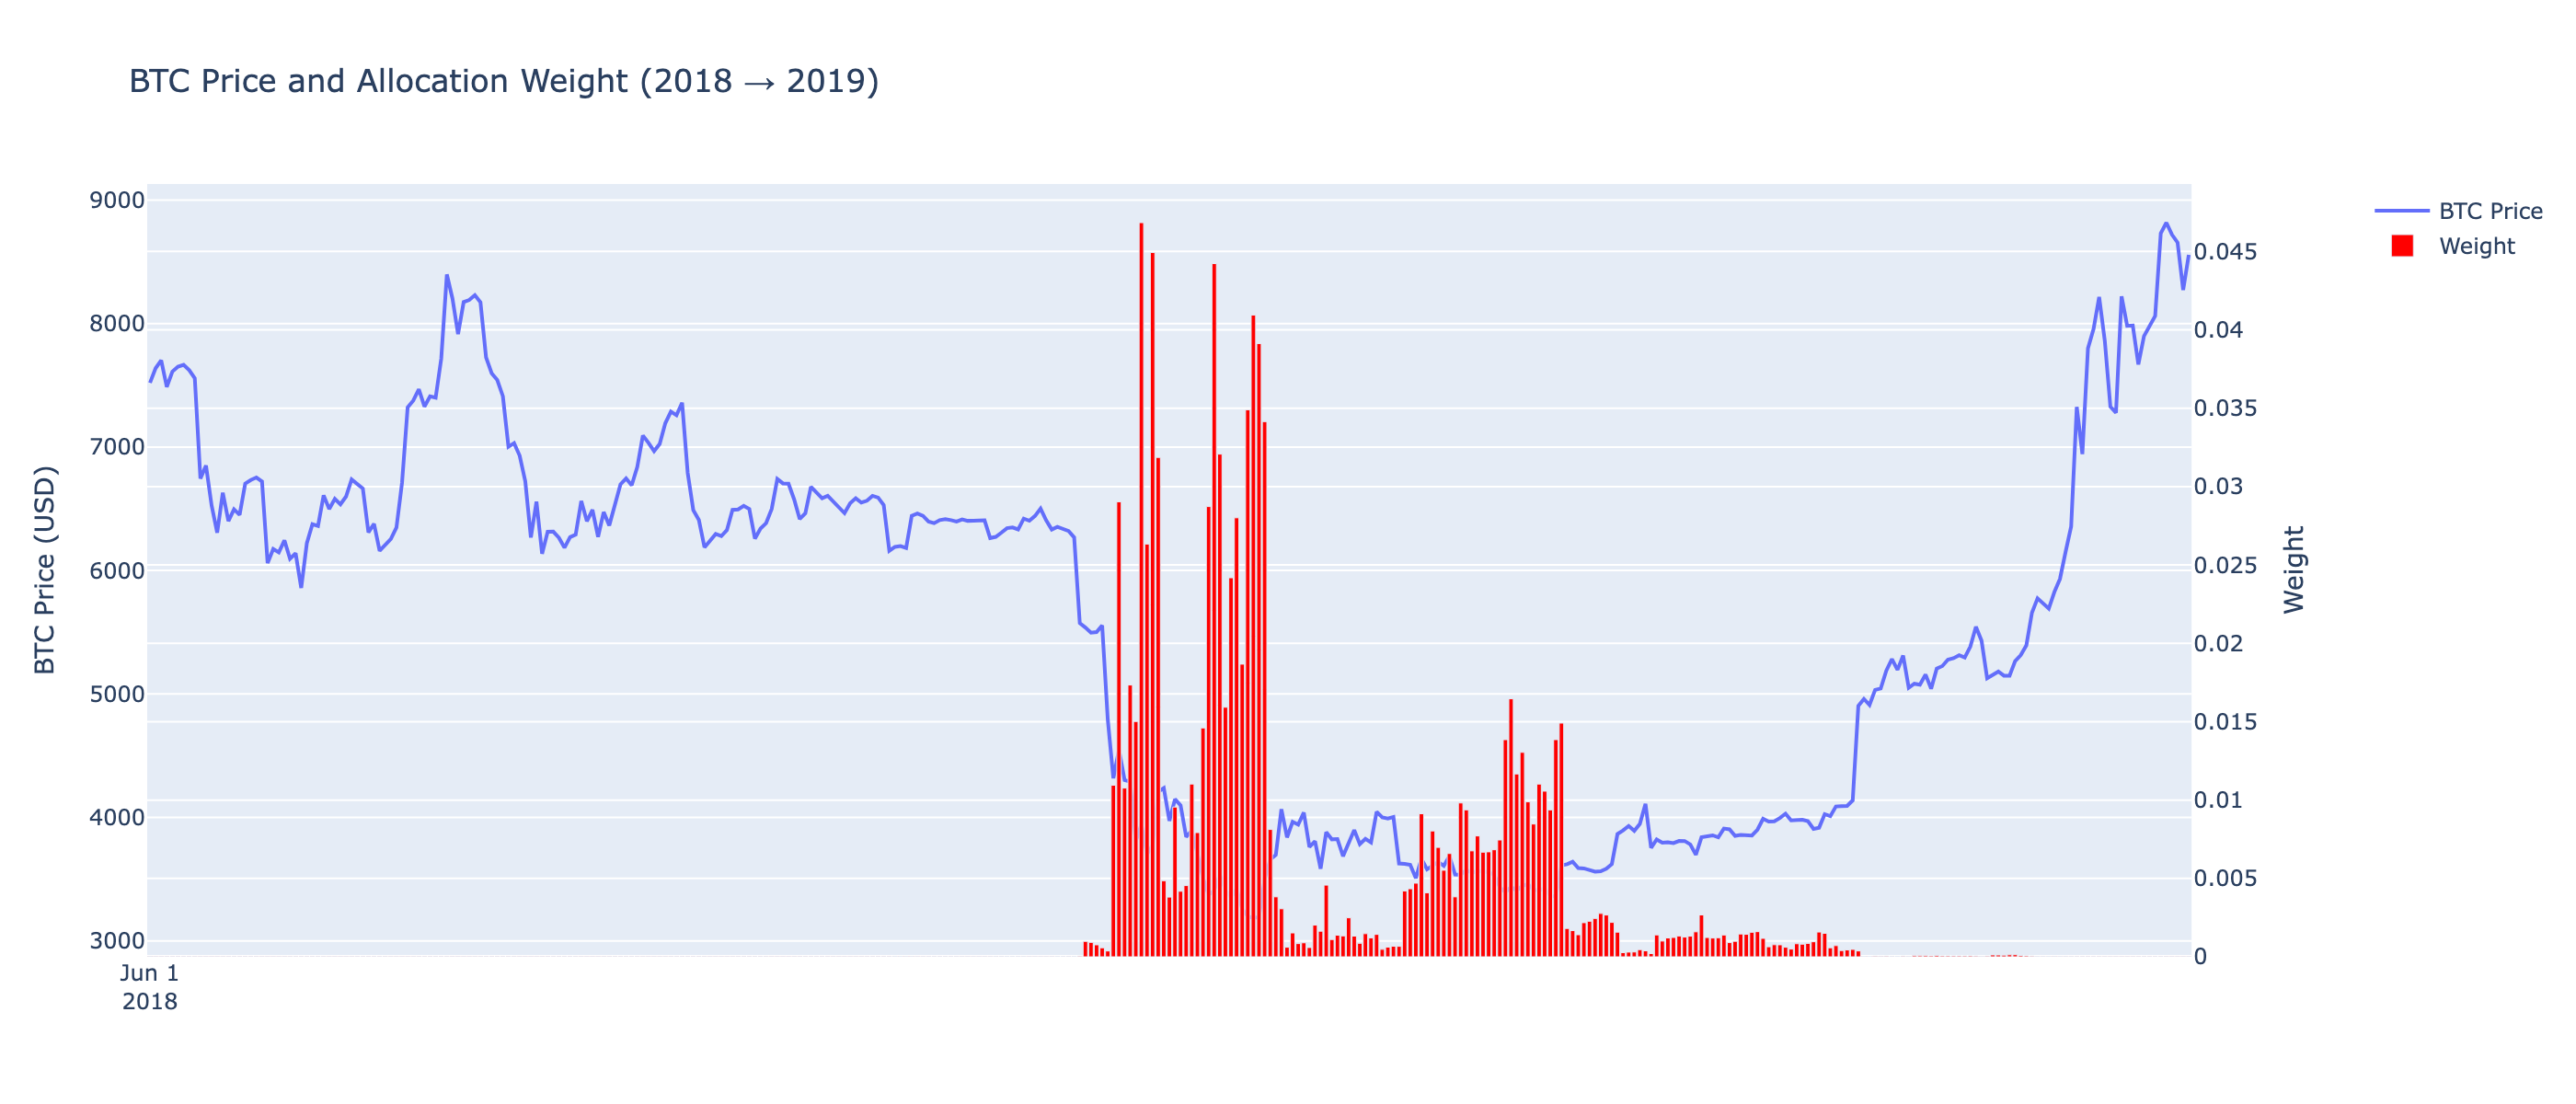

In [97]:
plot_weight_price_by_year(2018)

Between June 2019 and June 2020, the price moved in a more volatile, sideways pattern, without a clearly defined low range. However, we can still observe that the strategy significantly increased its allocation at the historical low point, and did so specifically when the price dropped sharply to that bottom level.

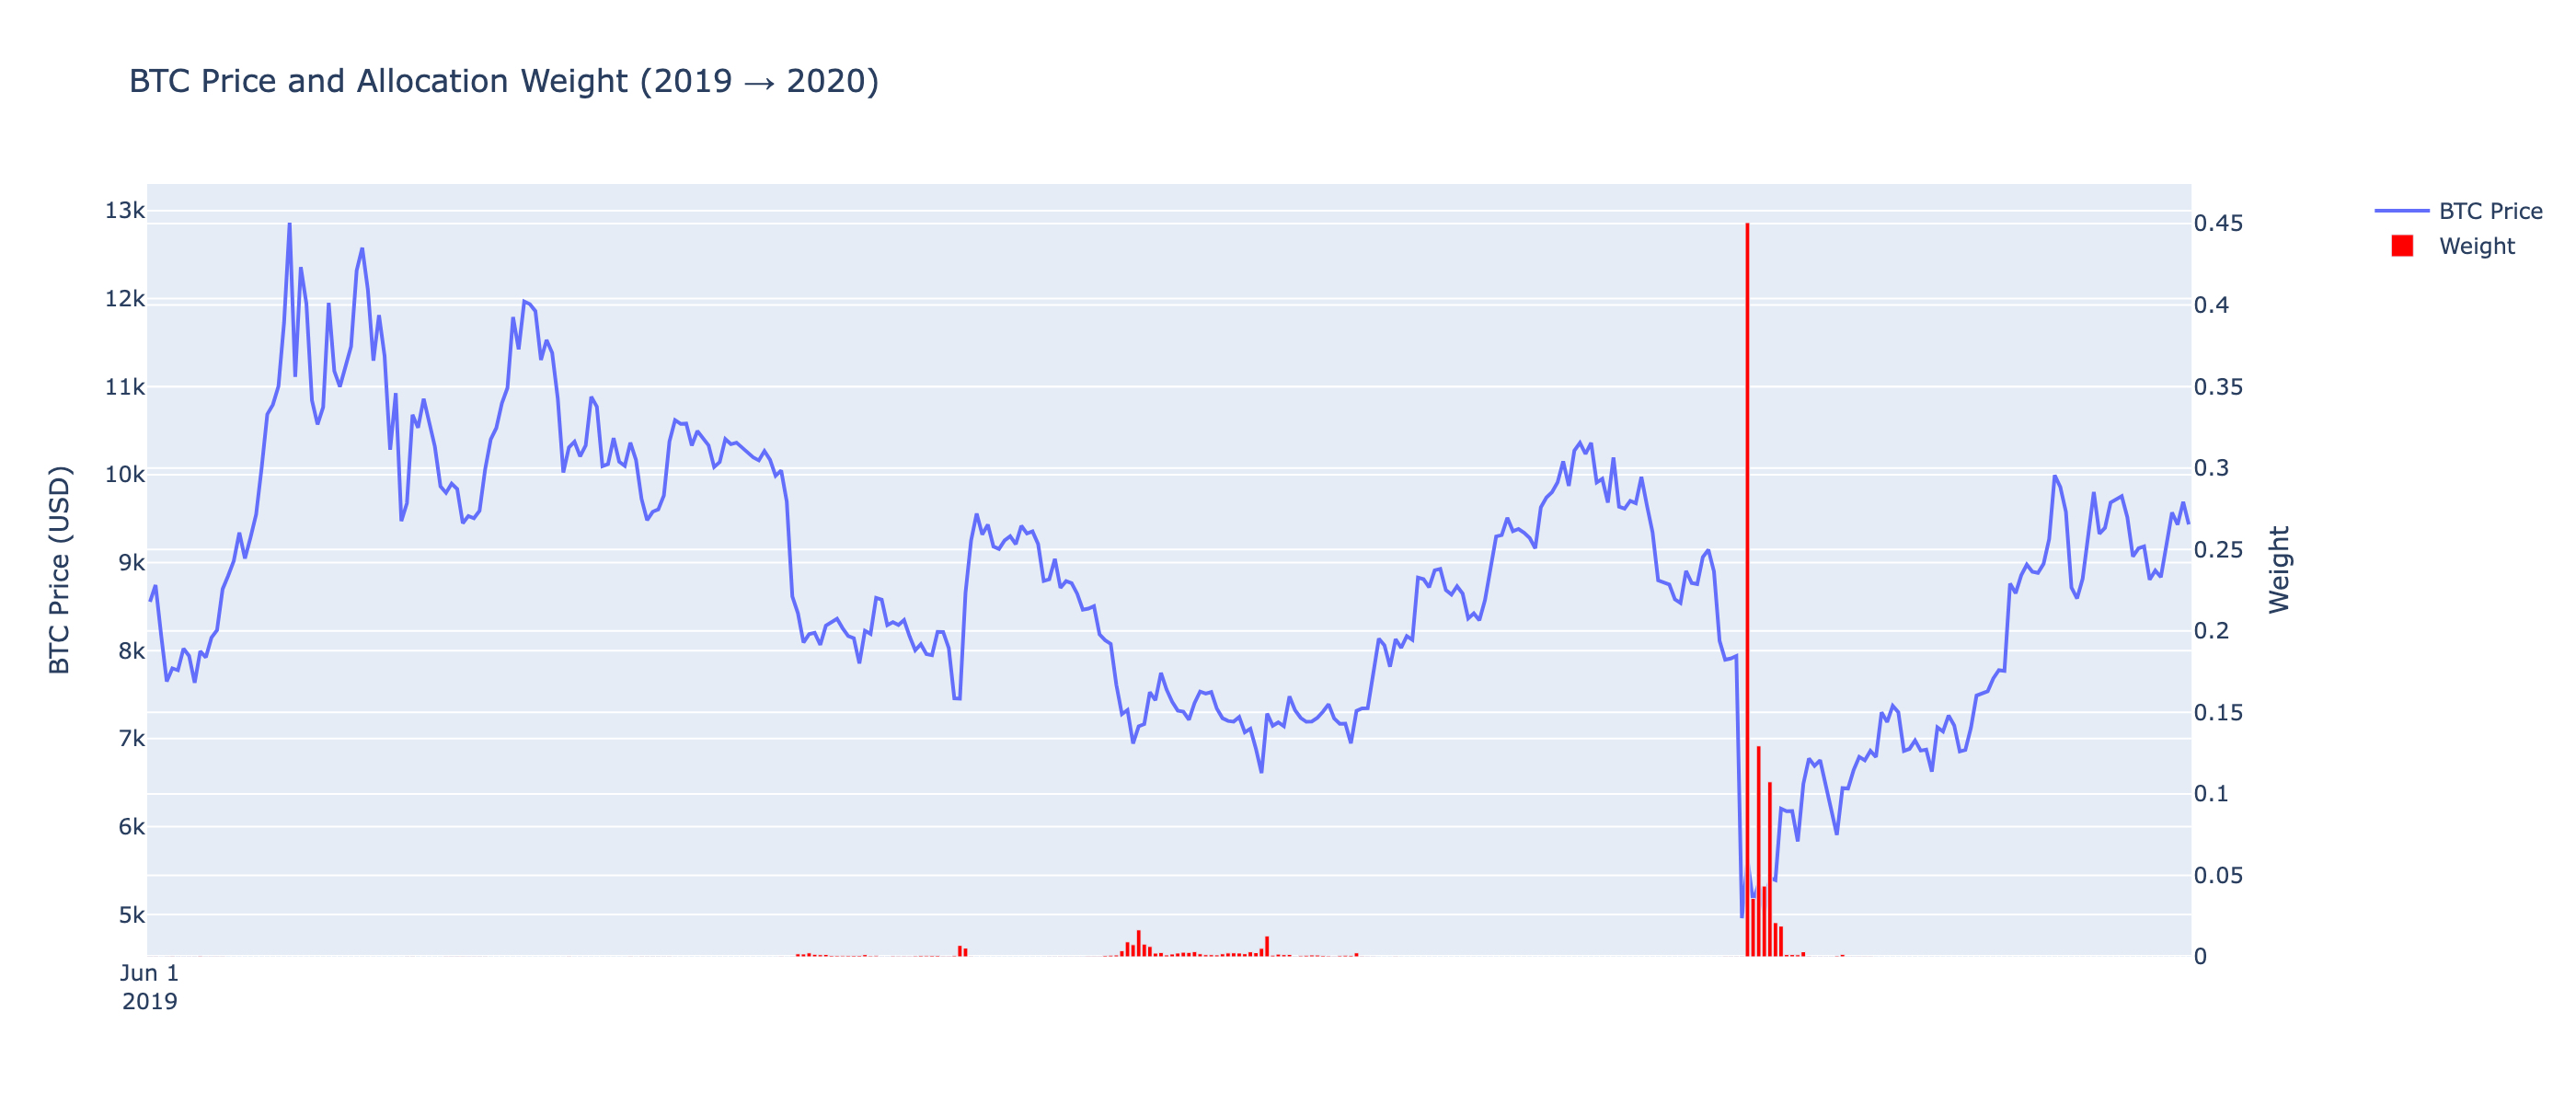

In [98]:
plot_weight_price_by_year(2019, 2020)

Between June 2020 and June 2021, the price trend showed a clear pattern, with a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated more allocation at the beginning of the year.

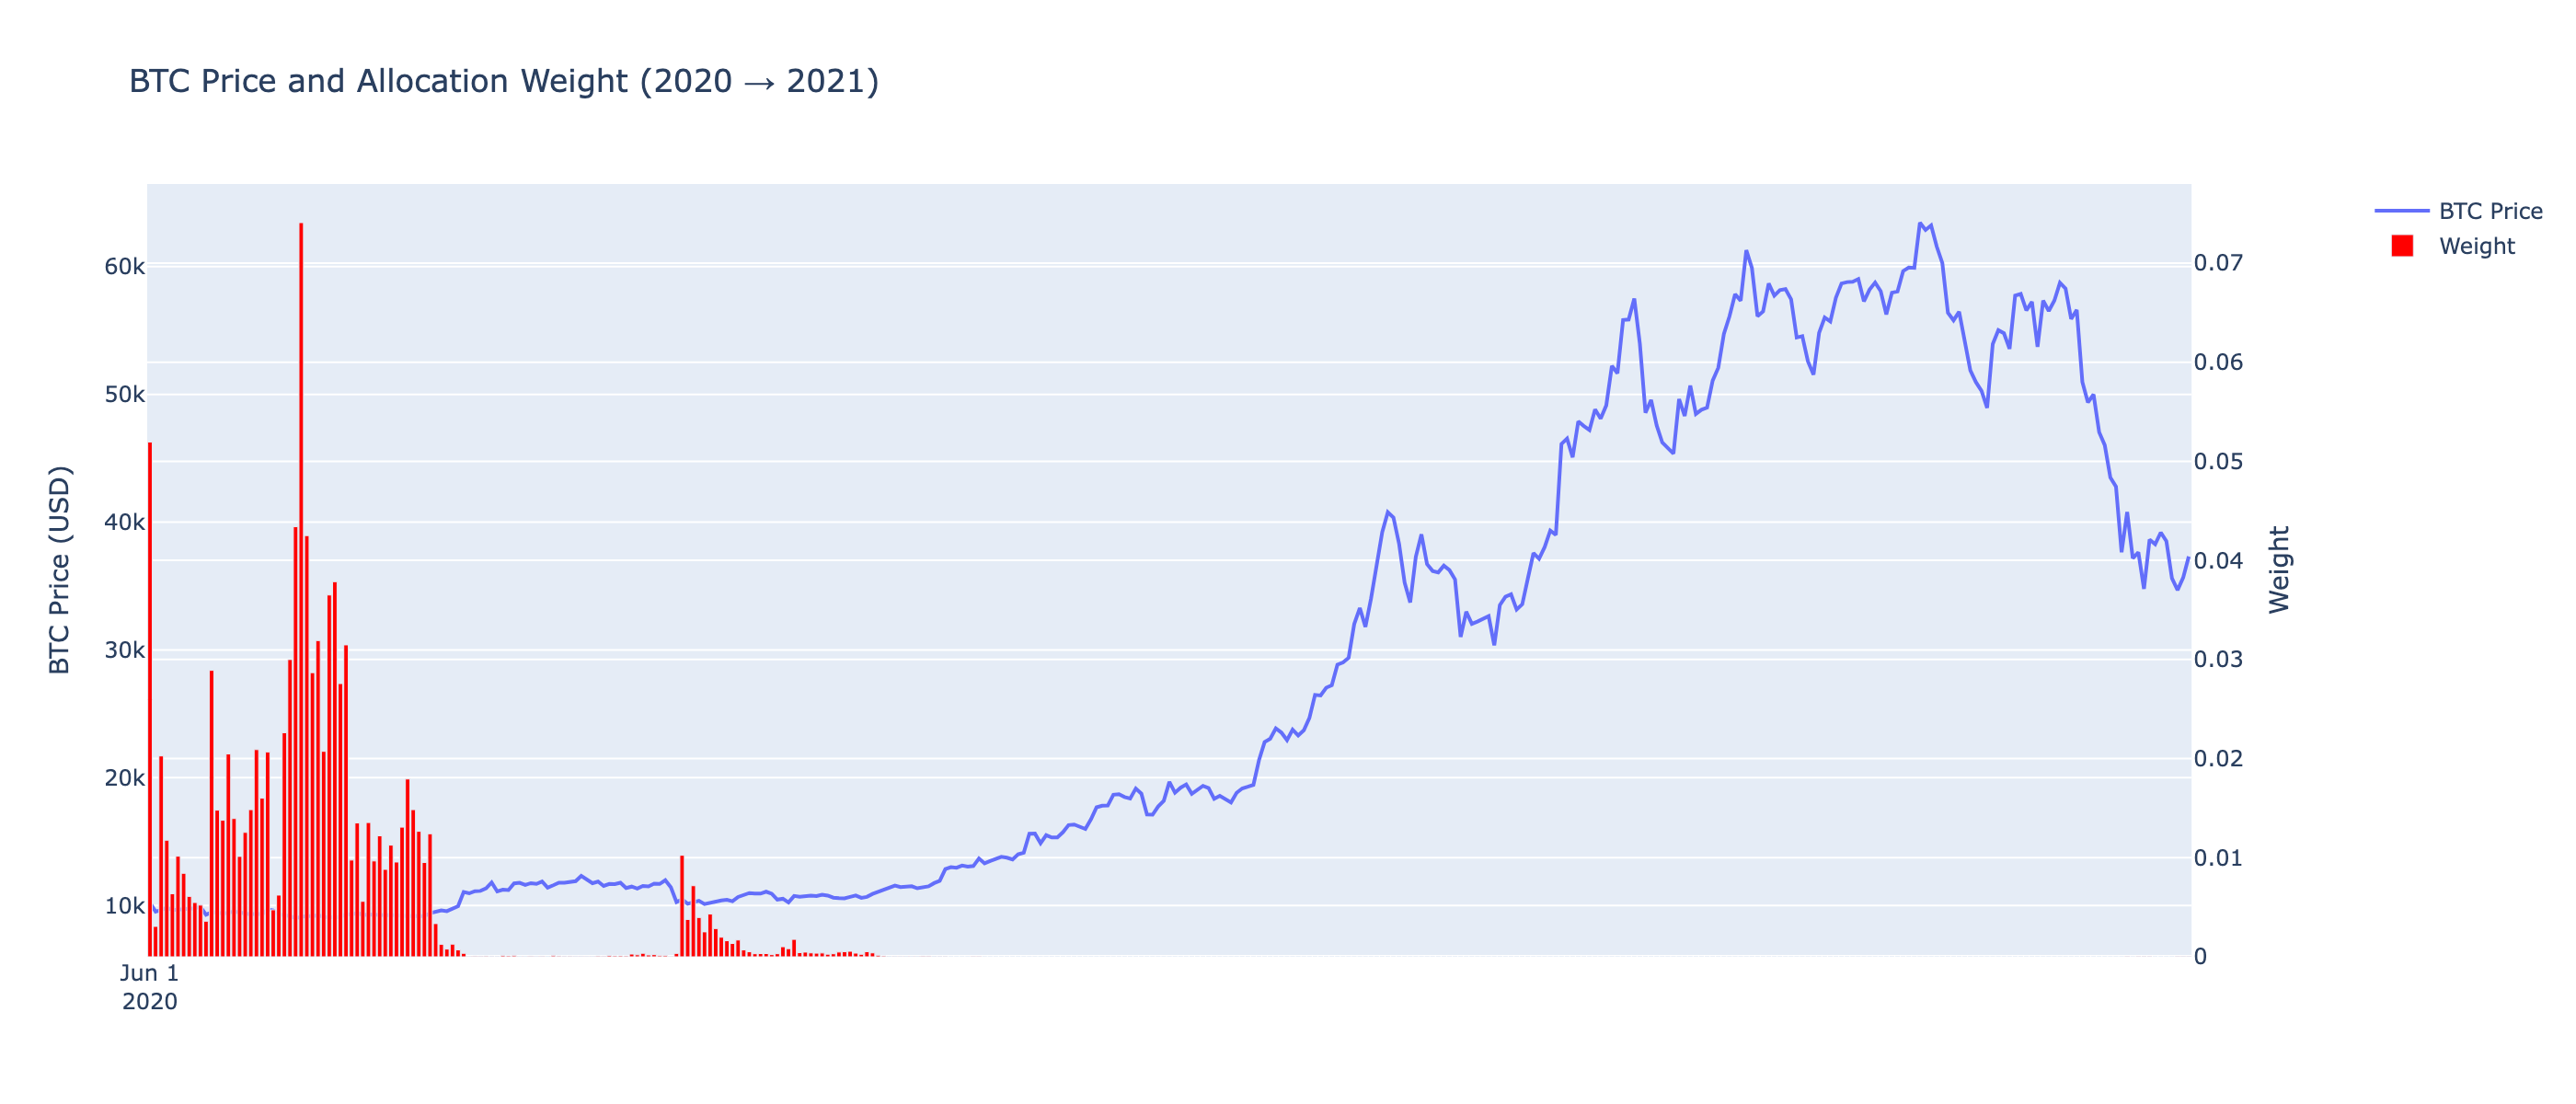

In [99]:
plot_weight_price_by_year(2020, 2021)

Between June 2020 and June 2021, the price trend showed lows at the beginning and end of the year, with a high in the middle of the year. The strategy chose to concentrate more allocation toward the end of the year.

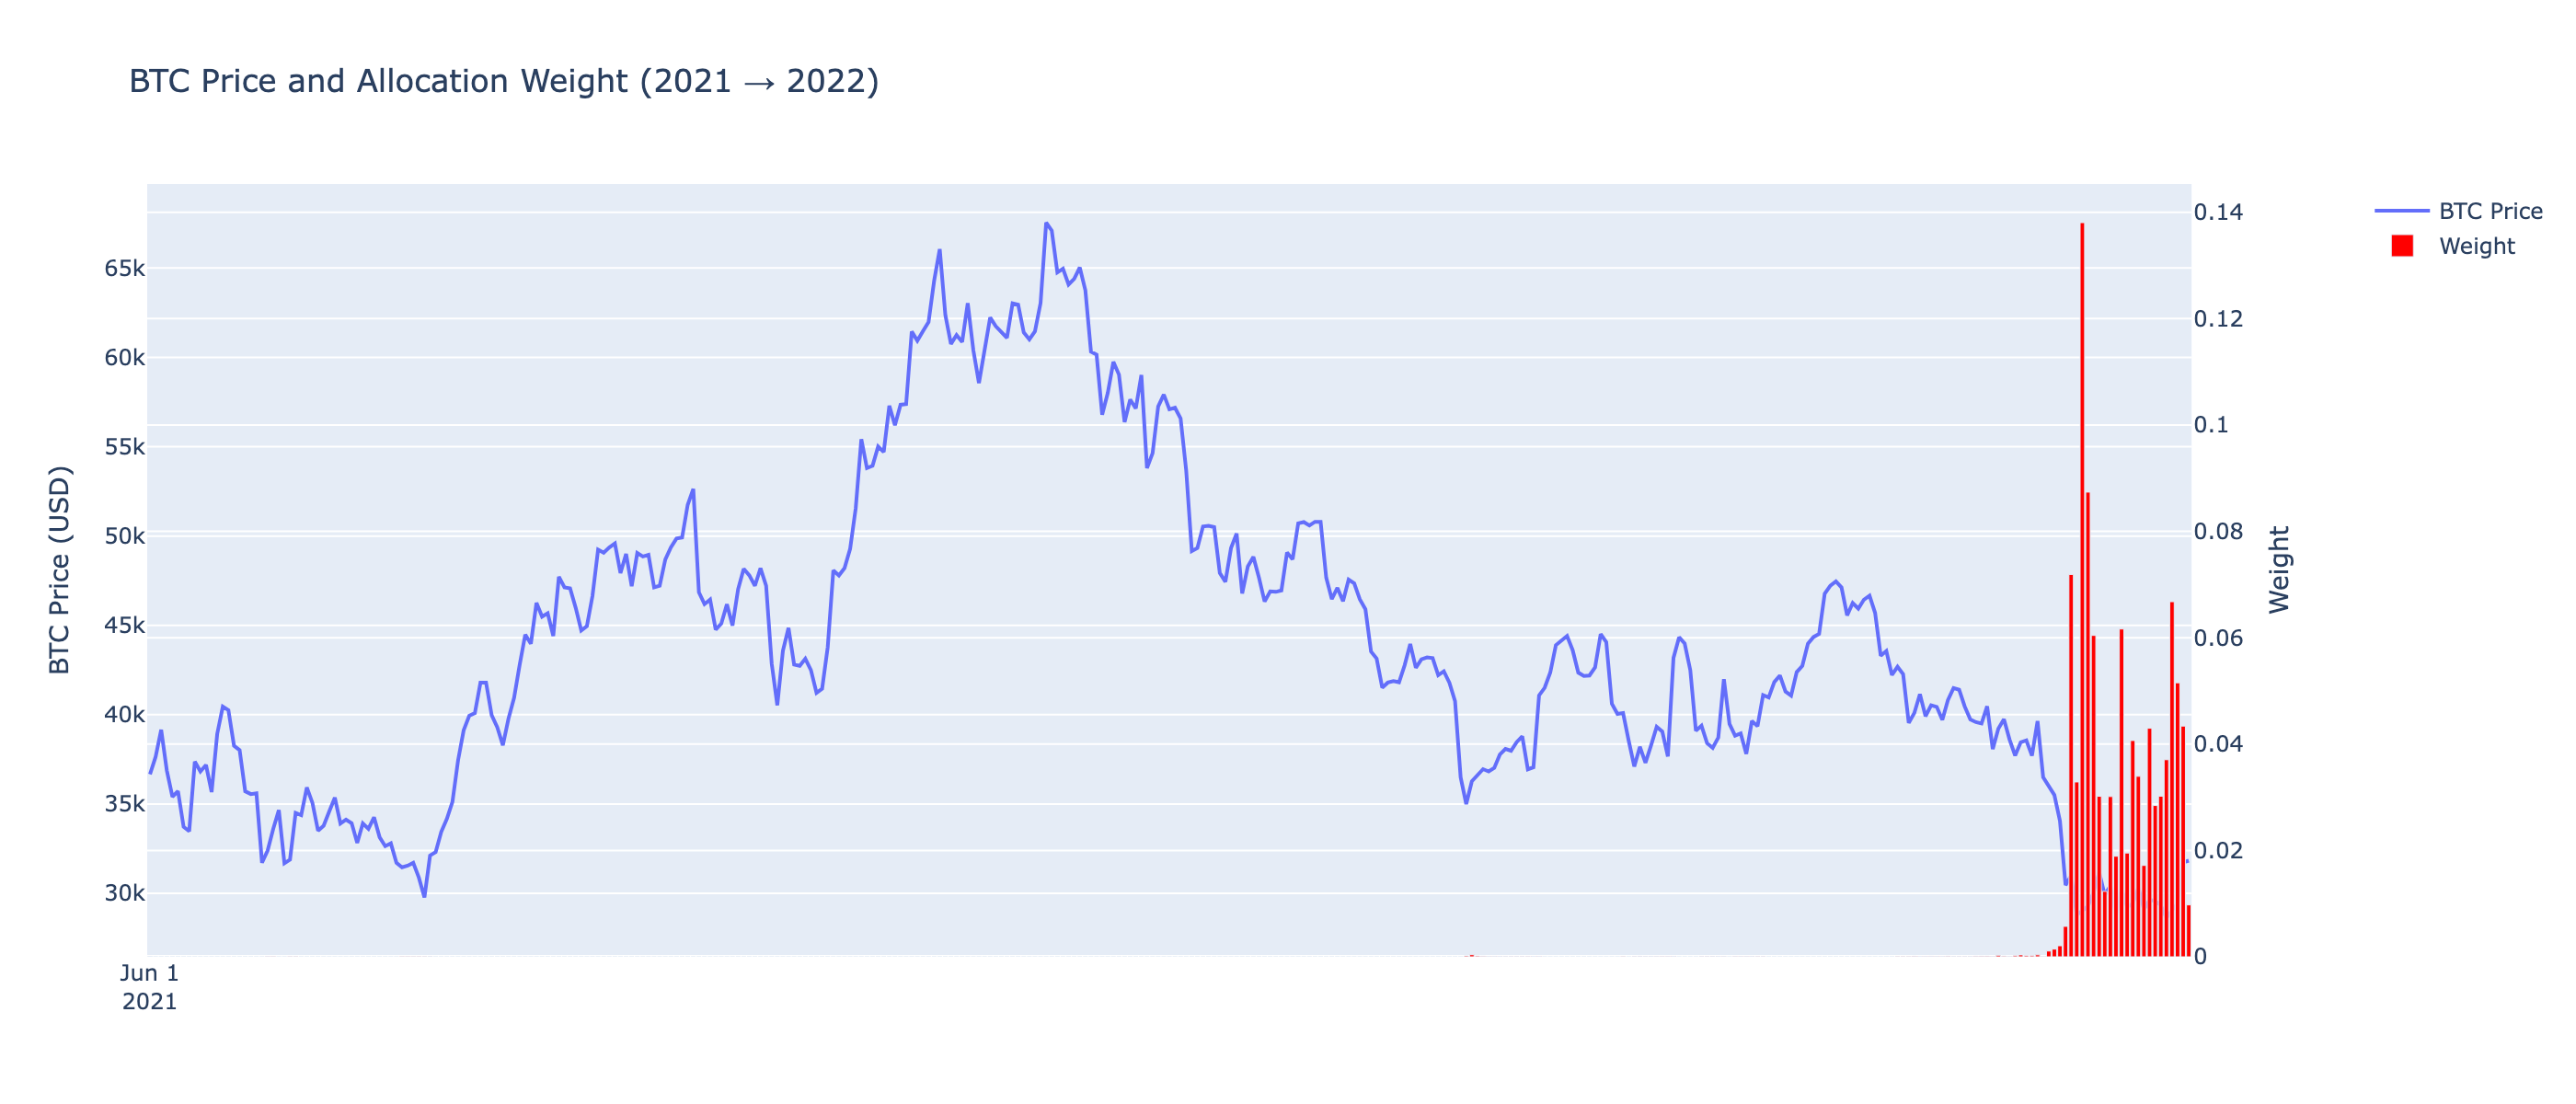

In [100]:
plot_weight_price_by_year(2021, 2022)

Between June 2022 and June 2023, the price trend showed highs at the beginning and end of the year, with a low in the middle. We can see that the strategy concentrated its allocation around the mid-year low. In addition, when there was a sharp drop in price at the beginning of the year, the model chose to increase allocation right after that drawdown.

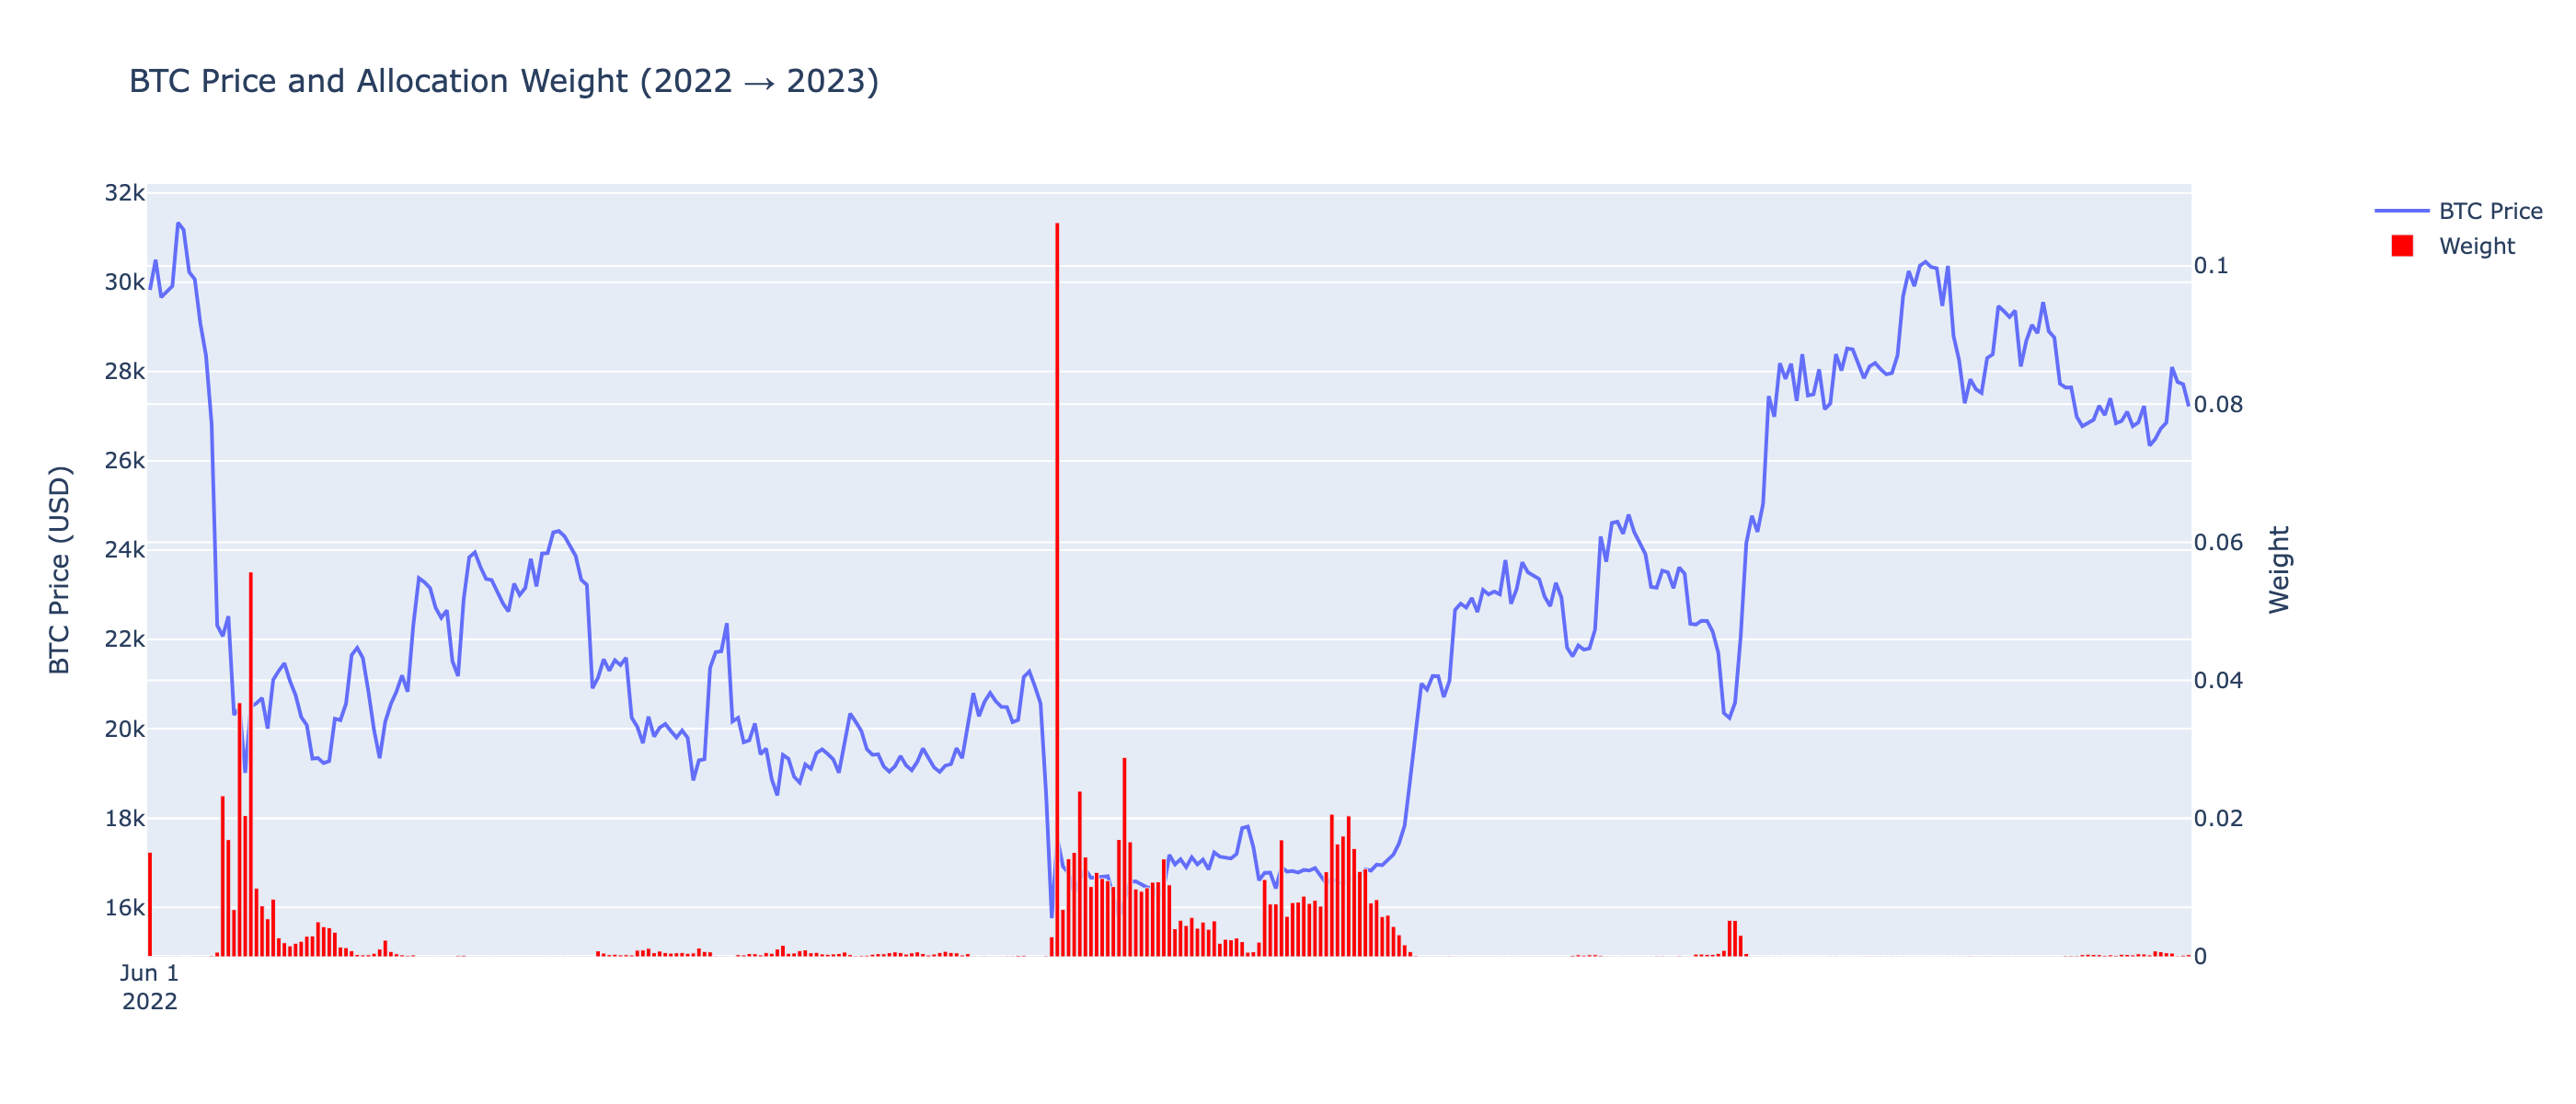

In [101]:
plot_weight_price_by_year(2022, 2023)

Between June 2023 and June 2024, the price trend showed a clear pattern, with a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated its allocation at the beginning of the year, and it increased the weight specifically around those relatively low price points.

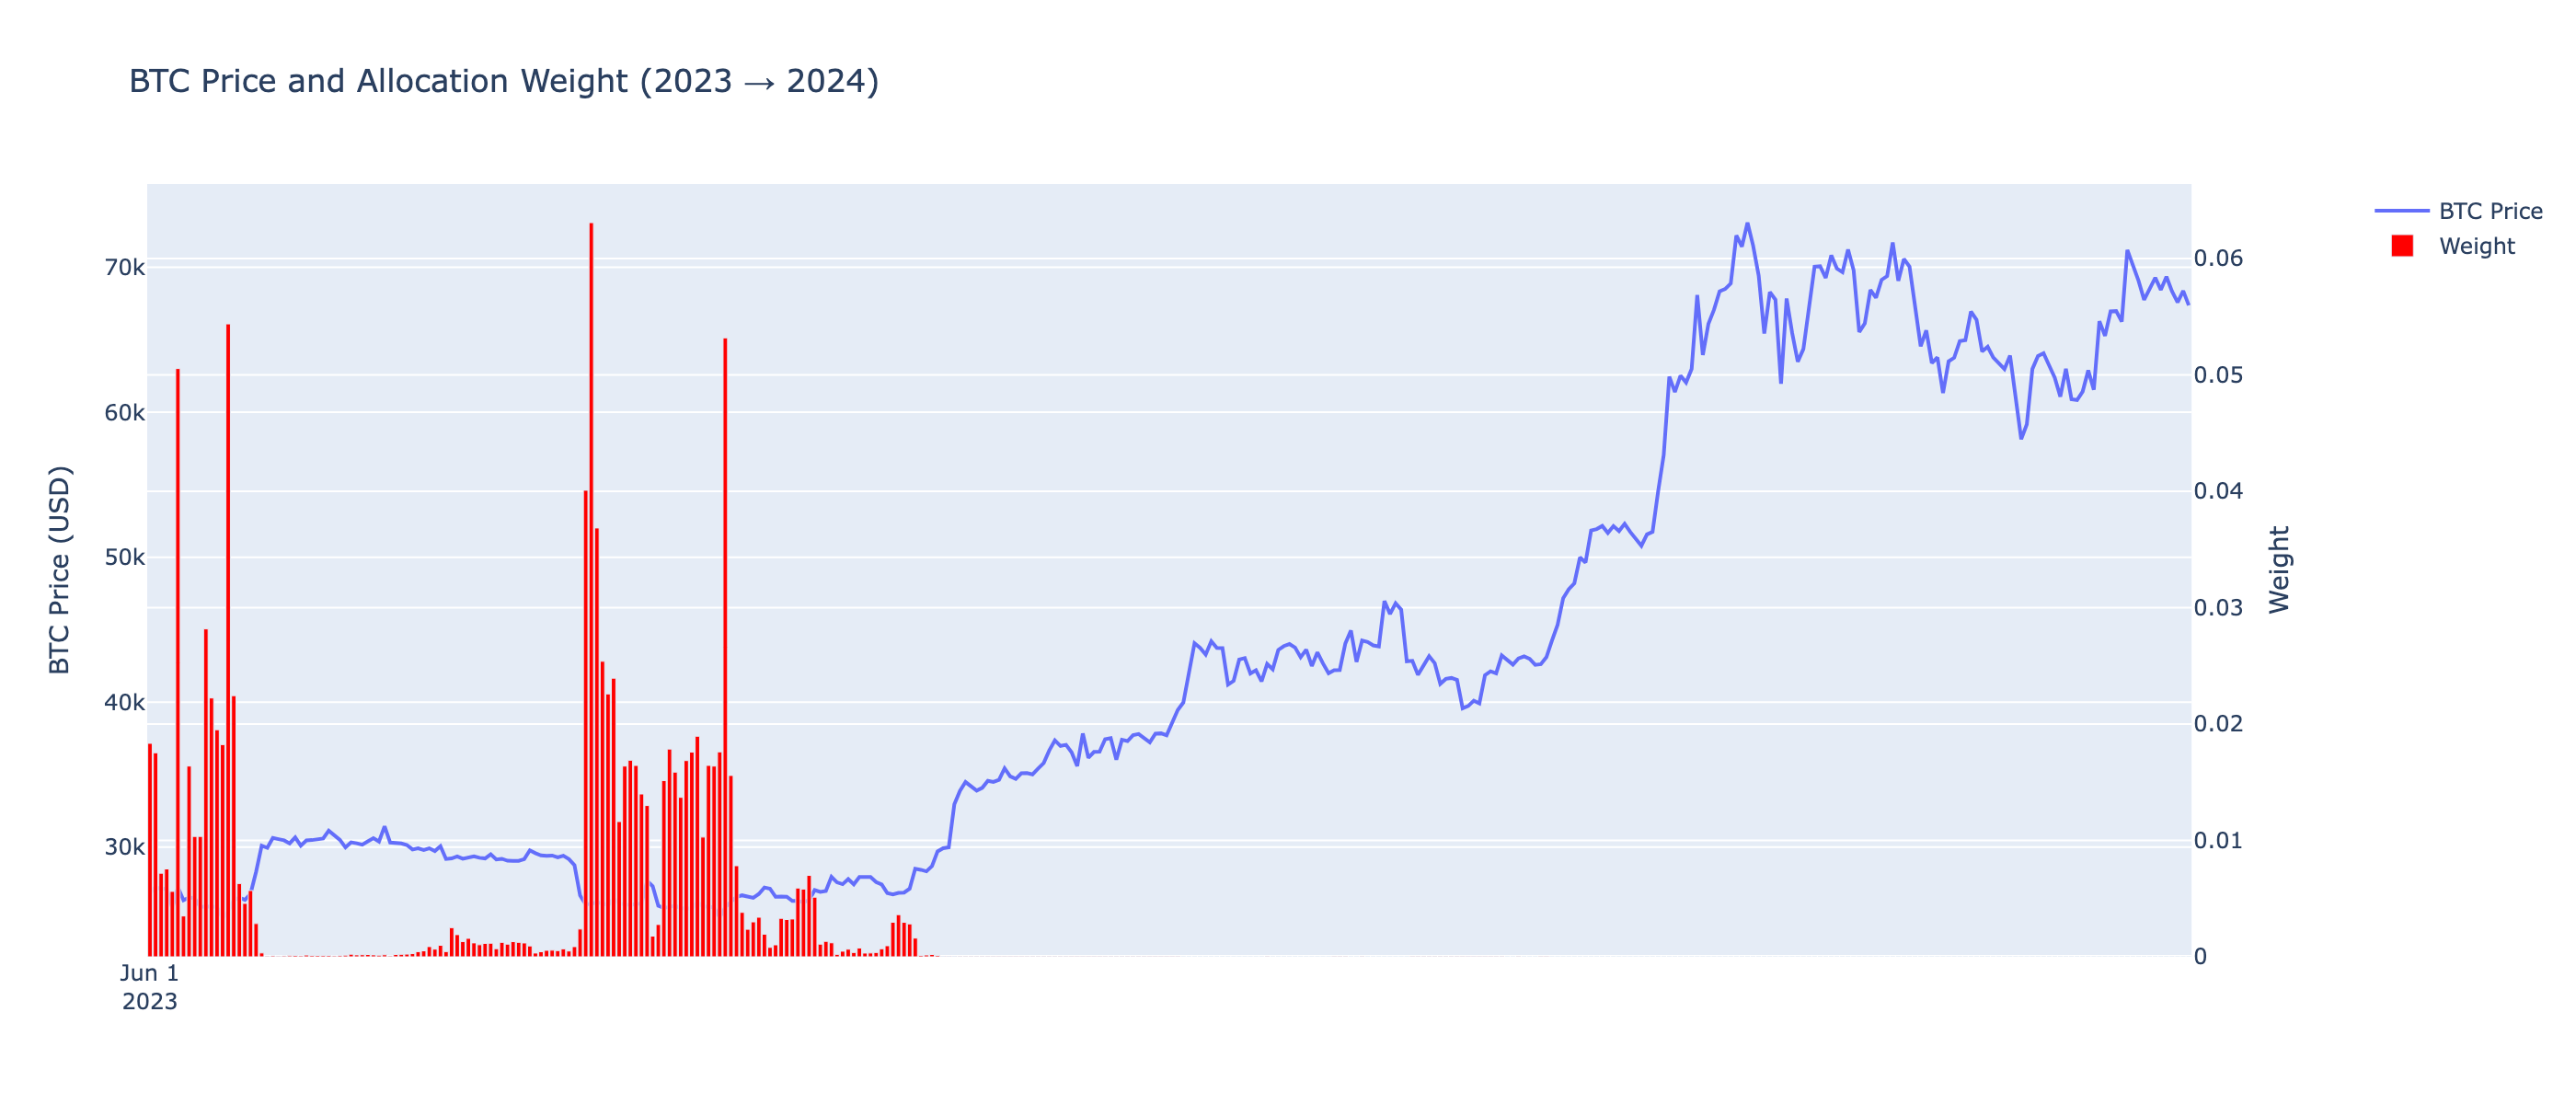

In [102]:
plot_weight_price_by_year(2023, 2024)

Between June 2023 and June 2024, the price trend also generally showed a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated its allocation at the beginning of the year, and increased the weight around those relatively low price levels.

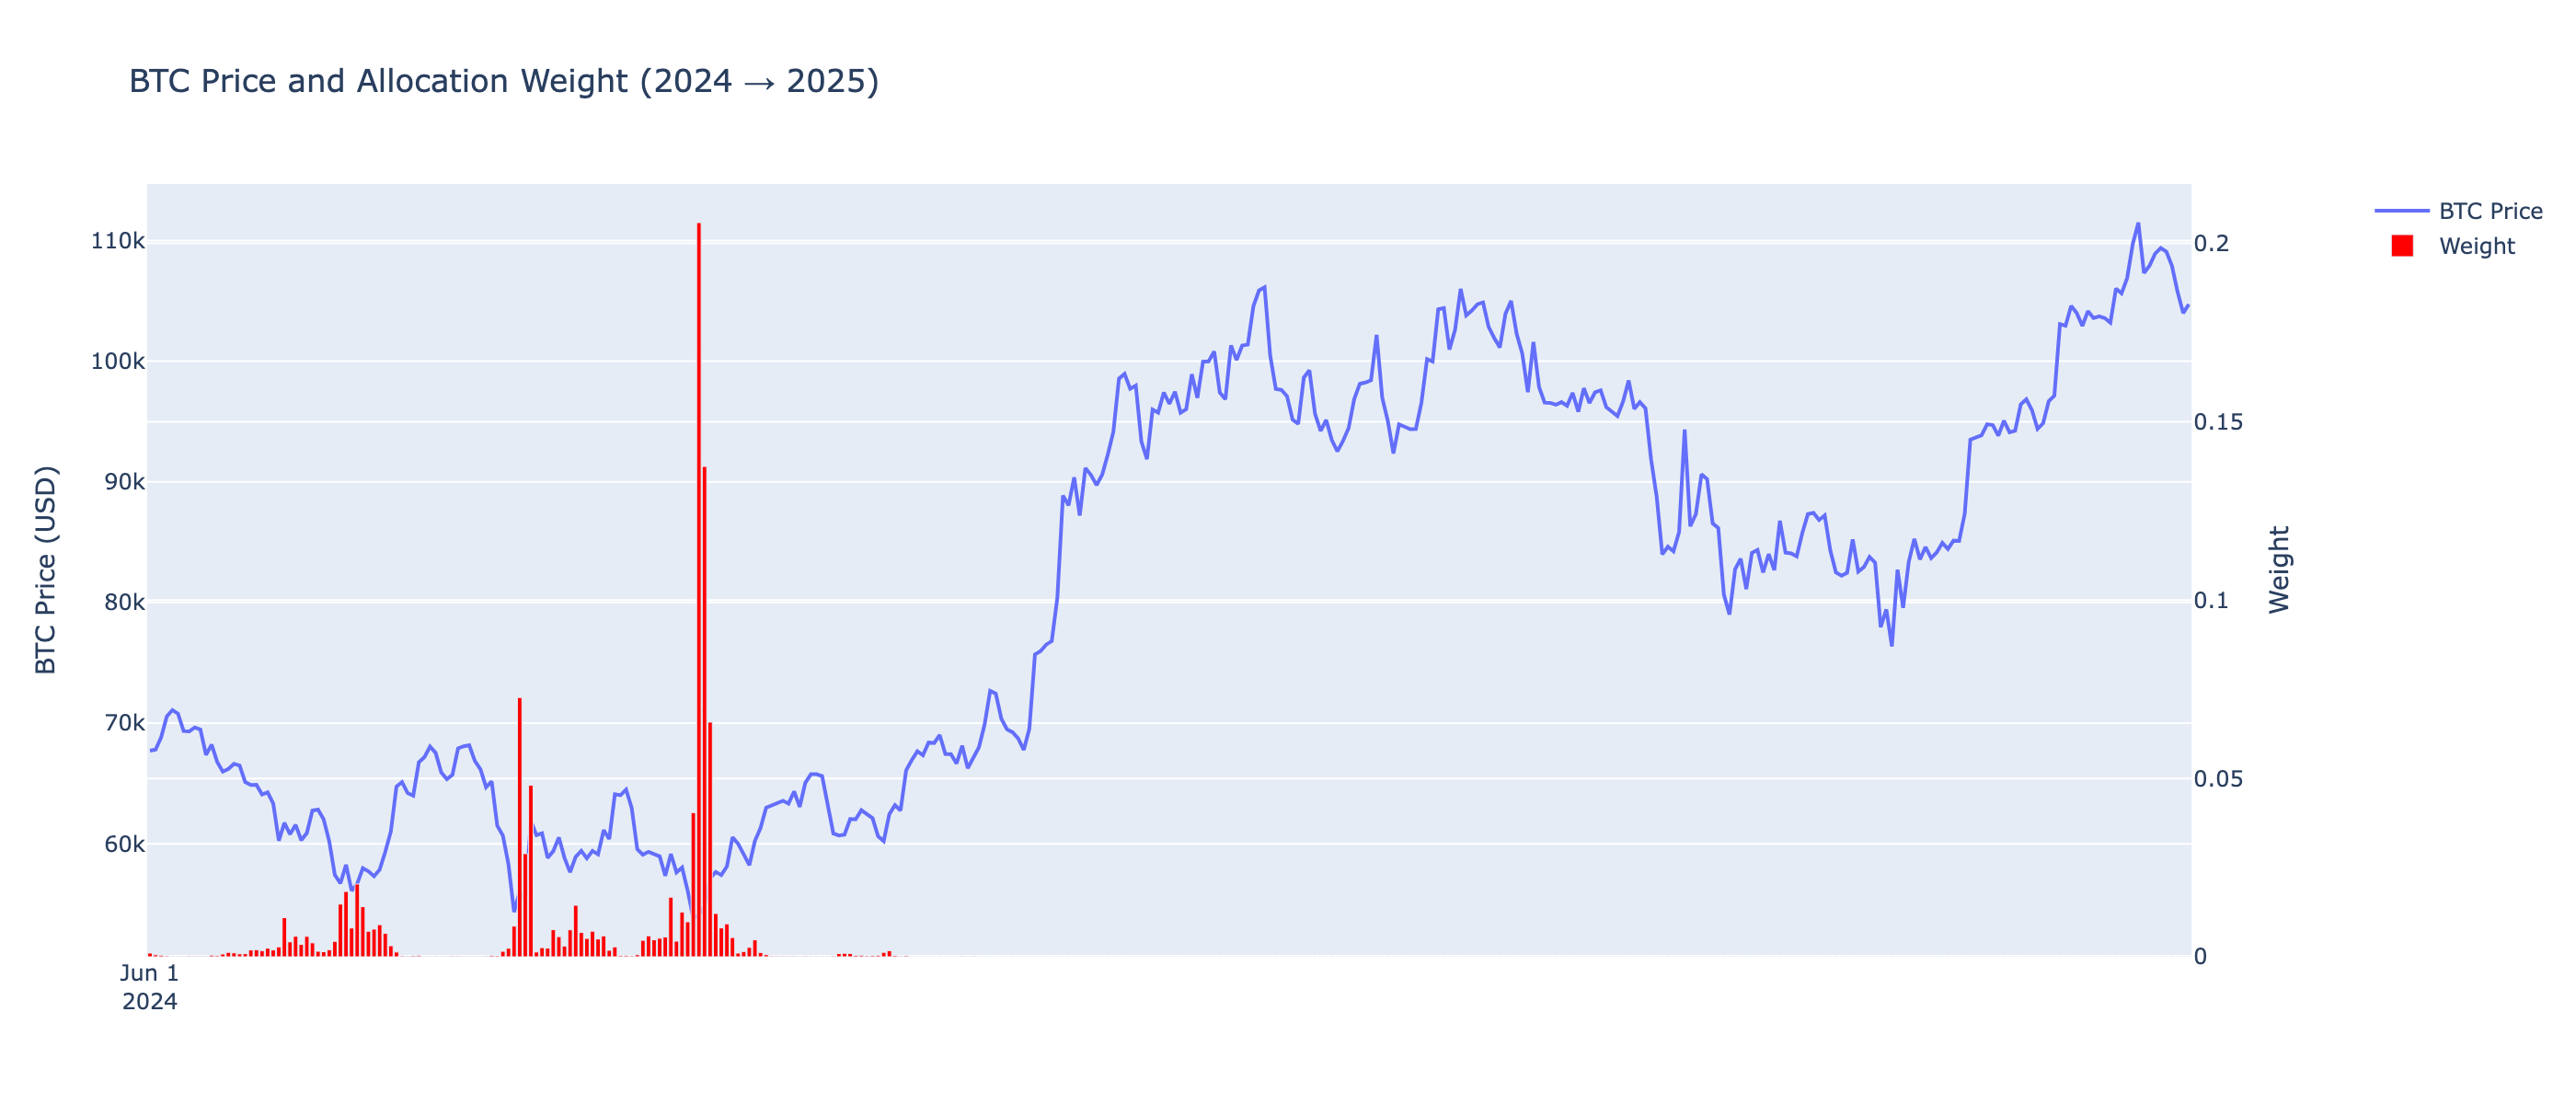

In [103]:
plot_weight_price_by_year(2024, 2025)

---

# 2. Investment Efficiency Insights  
### Does the information provided by the dashboard help investors buy more BTC with the same amount of money?

## 2.1 SPD Percentile vs Allocation – Are We Buying Cheap or Expensive?  
- **Question answered:**  
  **Does the dashboard help identify good buying opportunities?**  
- Approach:
  - Visualize distribution of SPD percentile and strategy allocation.
- Key Findings:
  - The DCA strategy allocate more budget when the SPD Percentile is high (relatively cheap) and reduce allocation when the SPD Percentile is low (relatively expensive).

By visualizing the distribution of SPD Percentiles alongside strategy allocation, we can assess whether the strategy is effectively identifying favorable buying opportunities.   

Ideally, this analysis should show a positive relationship between SPD Percentile and allocation. In other words, the strategy should allocate more budget when the SPD Percentile is high (relatively cheap) and reduce allocation when the SPD Percentile is low (relatively expensive).  
* SPD stands for “Spending Power of a Dollar.” It measures how much Bitcoin 1 dollar can buy on a given day. A higher SPD means Bitcoin is relatively cheap (your dollar buys more BTC), and a lower SPD means Bitcoin is relatively expensive.


### 2.1.1 SPD Percentile vs Allocation Weight (Aggregated Across Non-Overlapping 365-Day Windows: 2011–2025)

From this scatter plot, we see a clear positive relationship between SPD Percentile and allocation weight. When the SPD percentile is low, the strategy allocates almost nothing. As the SPD percentile increases, the allocation weight rises, and it increases sharply in the 80–100 percentile range, indicating a strong preference to allocate more when Bitcoin is relatively cheapest.

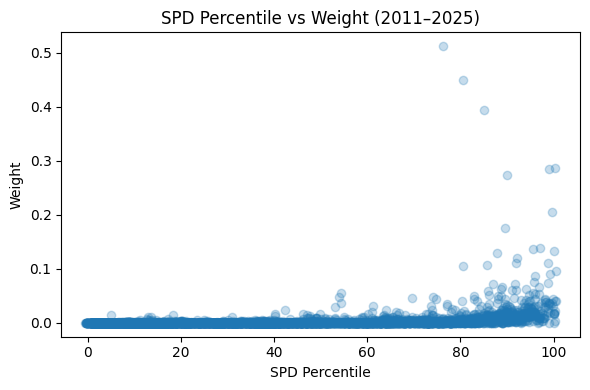

In [104]:
plot_percentile_vs_weight()

This boxplot shows the distribution of allocation weights across different SPD percentile buckets. Both the median and the mean (red dots) increase steadily from the lowest to the highest bucket. In particular, the 80–100 percentile group has by far the highest average weight, and its quartiles are packed very close together, meaning the allocations in this bucket are tightly clustered. This suggests that the strategy not only allocates more when Bitcoin is relatively cheapest, but also behaves more consistently in that cheap range.

/var/folders/dr/_j6dcxqs3zn8h1179k47j1s80000gn/T/ipykernel_75851/1624004424.py:33: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



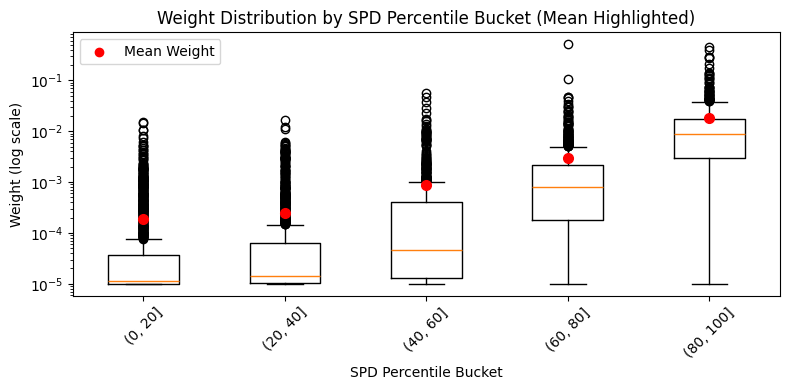

In [105]:
plot_weight_by_spd_bucket()


## 2.2 Simple Returns Win Rate in a yearly window: Dynamic vs Uniform DCA
- **Question answered:**  
  **Is using Dynamic DCA really more likely to achieve higher returns in a yearly window?**  
- Approach:
  - Win rate of annualized return between two strategies across 2011 to 2025
- Key Findings:
  - Dynamic DCA achieves higher simple returns than Uniform DCA in a 1-year window overally.
  - Dynamic DCA grows your portfolio’s asset value more efficiently in a 1-year window.
  - The simple return in a yearly window is directly linked to the total BTC accumulated in that window, since the investment budget is fixed. Therefore, Dynamic DCA accumulates more BTC than Uniform DCA in most yearly windows overall.

I focus on a one-year investment horizon and directly compare the annualized returns of the Dynamic DCA strategy against the traditional Uniform DCA approach. Using rolling 12-month windows from 2011 to 2025, I calculated the annualized return for both strategies in each window. I then compared their performance and computed the win rate of Dynamic DCA — the percentage of one-year periods in which Dynamic DCA outperformed Uniform DCA.  
  
The return is defined as the total portfolio value at the end of the window (total BTC holdings × price at that time) divided by the total budget:
$$
R = \frac{V_T - B}{B}
  = \frac{\text{BTC}_T \cdot P_T - B}{B}
$$

where

- $B$: total budget allocated within the 12-month window (the total amount of money invested)
- $P_T$: Bitcoin price at the end of the window
- $BTC_T$: total amount of Bitcoin accumulated by the end of the window
- $V_T = BTC_T \cdot P_T$: total portfolio value at the end of the window


The backtest shows that from 2011 to 2025, Dynamic DCA delivered higher annual returns than Uniform DCA in about 98% of the yearly windows.

In [106]:
win_table, rolling_ret_df = dynamic_vs_uniform_return_by_window()
win_table

win_rate_dynamic_%
Annual Return               98.72

## 2.3 Investment Efficiency: Dynamic vs Uniform DCA
- **Question answered:**  
**Which strategy uses capital more efficiently to accumulate Bitcoin over time?**
- Approach:
    - Calculate the evaluation metric:
        1. Total BTC Accumulation: The total amount of Bitcoin accumulated over time given a fixed investment budget.
        2. Weighted Avg SPD (Satoshis per Dollar): The average amount of satoshis acquired per dollar invested, weighted by the actual allocation.
        3. Effective Avg Purchase Price ($/BTC): The average price paid per Bitcoin, calculated as total investment divided by total BTC accumulated.
        4. Timing Efficiency: The percentage of capital allocated during historically cheap price periods (e.g., bottom 30% percentile).
- Key Findings:
    - With the same investment budget, Dynamic DCA accumulates significantly more Bitcoin at nearly half the average cost, primarily by allocating almost all capital to historically cheapest market conditions.

In [107]:
compare_dynamic_vs_uniform_efficiency()

Dynamic DCA  Uniform DCA
Total BTC Accumulation                          370.4        199.7
Weighted Avg SPD (sats per $)               3703658.2    1996656.2
Effective Avg Purchase Price ($/BTC)             27.0         50.1
Timing Efficiency (% capital in top 30%)         97.3         58.2

# 3. Risk Awareness & Stability  
### Does the dashboard help investors better understand the risks?

## 3.1 Summary of Risk Metrics  
- **Question answered:**  
  **What is the risk profile of the dashboard’s allocation approach?**
- Approach:
  - Compare risk metrics (Sharpe, Volatility) between Dynamic and Uniform DCA across 1-year rolling windows from 2011-2025
  - Explore the reason why Dynamic DCA underperform Uniform DCA in the risk metrics
- Key Findings:
  - Dynamic DCA has bad performance on risk metrics
  - Because Dynamic DCA concentrates its allocations in low-price regions, it naturally exhibits high volatility and a lower Sharpe ratio.

- When comparing strategies, return alone is not enough. We also care about the stability and risk profile of those returns. These are some of the most classic and widely used risk metrics in investing and portfolio analysis. That’s why we look at four risk metrics: 
  1. Sharpe
      - Tells us how much return we earn for each unit of overall risk.
      - Measures risk-adjusted return using total volatility.
      - Higher is better.
  2. Sortino
      - Focuses only on “bad” volatility (downside moves), which is closer to how investors actually feel losses.
      - Measures risk-adjusted return using only downside volatility.
      - Higher is better.
  3. Max Drawdown 
      - Captures the worst peak-to-trough loss, showing the worst loss an investor would have experienced.
      - Lower absolute value is better.
      - Important for judging emotional and financial survivability.
  4. Volatility
      - Measures how much the price fluctuates over time.
      - Higher volatility means more uncertainty and risk.
      - Lower is better.
- Uniform DCA is used as a benchmark to compare the dynamic strategy’s risk.

### 3.1.1 Risk Profile Comparison: Dynamic vs Uniform DCA

See the risk profile of the Dynamic DCA strategy over one-year to long-term horizon:
1. Risk faced by long-term investors: evaluate the risk metrics of the Dynamic DCA strategy over the 2011–2025 period to capture the risk profile for long-term investors.
2. Risk for one-year investment: calculate rolling one-year risk metrics to see how the strategy behaves across different starting dates and to evaluate its stability over time.

Use uniform DCA — the most basic and common investment method for non-professional investors — as a benchmark to see whether our high-performance Dynamic DCA strategy also delivers better risk management than this conservative, steady approach.

In this analysis, we define the “daily return” for the Sharpe ratio using ΔBTC, the change in accumulated Bitcoin between consecutive days:

$$ \Delta\text{BTC}_t = \text{BTC}_t - \text{BTC}_{t-1}.$$

- Why use ΔBTC as the return input?
   1. **Objective alignment**  
      The strategy’s objective is to maximize Bitcoin accumulation, not USD portfolio value. A natural notion of “daily performance” is therefore:  
      How much additional BTC did we accumulate today compared to yesterday?

   2. **Avoiding price-dominated signals**  
      If we instead use USD-based returns, e.g.
      $$
      r_t^{\text{USD}} = \frac{V_t - V_{t-1}}{V_{t-1}},
      \quad V_t = \text{BTC}_t \cdot P_t,
      $$
      the signal is dominated by Bitcoin price movements rather than the allocation logic. BTC price can go up and make USD returns look good even on days when the strategy barely buys anything. In other words, price swings do not actually reflect the performance of BTC accumulation. This is not a meaningful way to evaluate an allocation algorithm.

- Under this definition, the Sharpe ratio can be interpreted as:
   - **Return** ≈ how much BTC the strategy accumulates on average per day;
   - **Volatility** ≈ how uneven or concentrated the timing of BTC purchases is.

- Not use the Sortino ratio:  
The Sortino ratio requires downside returns — values below 0 — because it measures return per unit of downside risk.  
However, $\Delta \text{BTC}_t \ge 0$ by construction: the strategy only accumulates BTC and never sells, so there are no negative “returns” in this metric. Without downside observations, the Sortino ratio is not well-defined or informative in this setting.


After computing risk metrics (Sharpe, annualized volatility) for all 1-year rolling windows from 2011 to 2025, I find that Dynamic DCA never beats Uniform DCA on Sharpe or volatility in any single window.  
In addition, when I aggregate across windows and compute the same risk metrics over the full 2011–2025 sample, Dynamic DCA also underperforms Uniform DCA on every risk metric.

In [108]:
metrics_df, win_rate_table = rolling_12m_risk_metrics_by_window()
win_rate_table

win_rate_dynamic_%
sharpe                            0.0
volatility_annual                 0.0

In [109]:
df_portfolio, risk_metrics = build_portfolio_and_risk_metrics_full_history()
risk_metrics

sharpe  volatility_annual
Dynamic DCA  1.3226           192.6488
Uniform DCA  5.3636            25.6053

### 3.1.2 Why Dynamic DCA Performs Worse on Sharpe/Volatility Metrics

From both the table and the distribution plot, we can clearly see why Dynamic DCA performs poorly under Sharpe-style risk metrics, even though it wins almost all windows in annual BTC accumulation.

1. **Dynamic DCA Wins on Return but Loses on Risk**    
    - From the table, Dynamic DCA achieves a higher annual return in almost every 1-year rolling window. However, its volatility is also consistently much higher than Uniform DCA.  
    - This means: Dynamic DCA accumulates more BTC, but it does so in a highly concentrated and uneven manner.

2. **The ΔBTC Distribution Explains the Behavior**.     
    - From the ΔBTC distribution plot: Dynamic DCA has many days with ΔBTC = 0 (no purchase). But when it buys, it often produces very large spikes in ΔBTC. Uniform DCA shows a stable, tight distribution (same buy amount every day).  
    - This reflects the core nature of the strategy: Dynamic DCA concentrates purchases on low-price days (heavy conviction at bottoms) while ignoring most other days.

3. **High Concentration = Extremely High Variance**
    - Because Dynamic DCA makes rare but very large allocations, its ΔBTC series becomes extremely “spiky”. This creates very large variance, even if the mean return is slightly higher.

4. **Sharpe Ratio Gets Crushed**
    - Sharpe Ratio = (mean return) / (standard deviation of return)
    - Dynamic DCA suffers because: Mean return ↑ slightly (boosted by huge low-price buys) Standard deviation ↑↑↑ massively (due to rare extreme purchases)
    - The denominator (volatility) dominates Sharpe becomes very small or even 0, despite the fact that Dynamic DCA actually performs better at accumulating BTC.

In [110]:
metrics_df, win_rate_table = rolling_12m_mean_vol_returns_by_window()
win_rate_table

win_rate_dynamic_%
return_annual                   97.72
volatility_annual                0.00

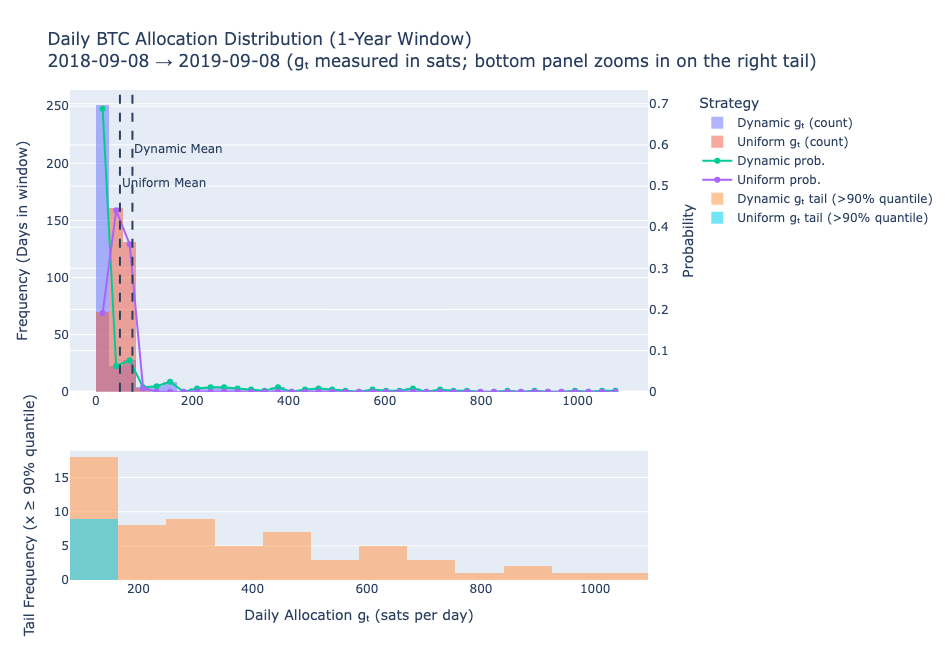

In [111]:
plot_gt_distribution_with_tail_plotly(window_id=100, tail_q=0.9)

## 3.2 Allocation Response to Risk  
- **Question answered:**  
  **Even with high volatility, can Dynamic DCA reliably concentrate purchases at true price lows, rather than mistakenly overweighting at market highs?**
- Approach:
  - Calculate average allocation weight across all rolling windows from 2011–2025 with SPD percentile ≥ 80
  - Show 1-year rolling window price trend and allocation-weight distribution plot
- Key Findings:
  - Dynamic DCA’s high volatility actually comes from its ability to concentrate heavily at low-price regions, which is not a negative sign.


High volatility reflects unstable returns. For Dynamic DCA, where performance is measured by the amount of Bitcoin accumulated, extremely volatile BTC increments can happen when the strategy “loads up” at certain moments. This can lead to two very different outcomes:
- if the heavy allocation happens near a market peak, the strategy ends up accumulating very little BTC — a very bad outcome;
- but if it happens near a market bottom, it accumulates a lot of BTC — a very good outcome.

The problem is that heavy allocation itself is risky. You can’t be sure whether you’re concentrating your buying at the top or at the bottom. That’s why risk metrics exist — to penalize this type of concentrated behavior.

We already know Dynamic DCA has this “heavy allocation” characteristic and naturally exhibits high volatility. But if the strategy consistently loads up at the lows, then this behavior is actually ideal. So the next question we want to investigate is: Does Dynamic DCA truly concentrate its buying at price lows?  

If the answer is yes, then we believe the strategy is effectively avoiding the risks that volatility is supposed to warn us about.

We examined the average allocation weight across all rolling windows from 2011–2025 with SPD percentile ≥ 80, and found that as much as 73.06% of the total allocation weight was concentrated in price-low regions. This confirms that the Dynamic DCA strategy indeed tends to place heavy allocations at market bottoms.

In [112]:
avg_weight = avg_weight_after_80pct()

Average weight sum after 80th percentile = 73.06 %


We also visualized the price trend together with the allocation weights, and in every 1-year window, we can clearly see that the strategy consistently concentrates its buying around price lows.

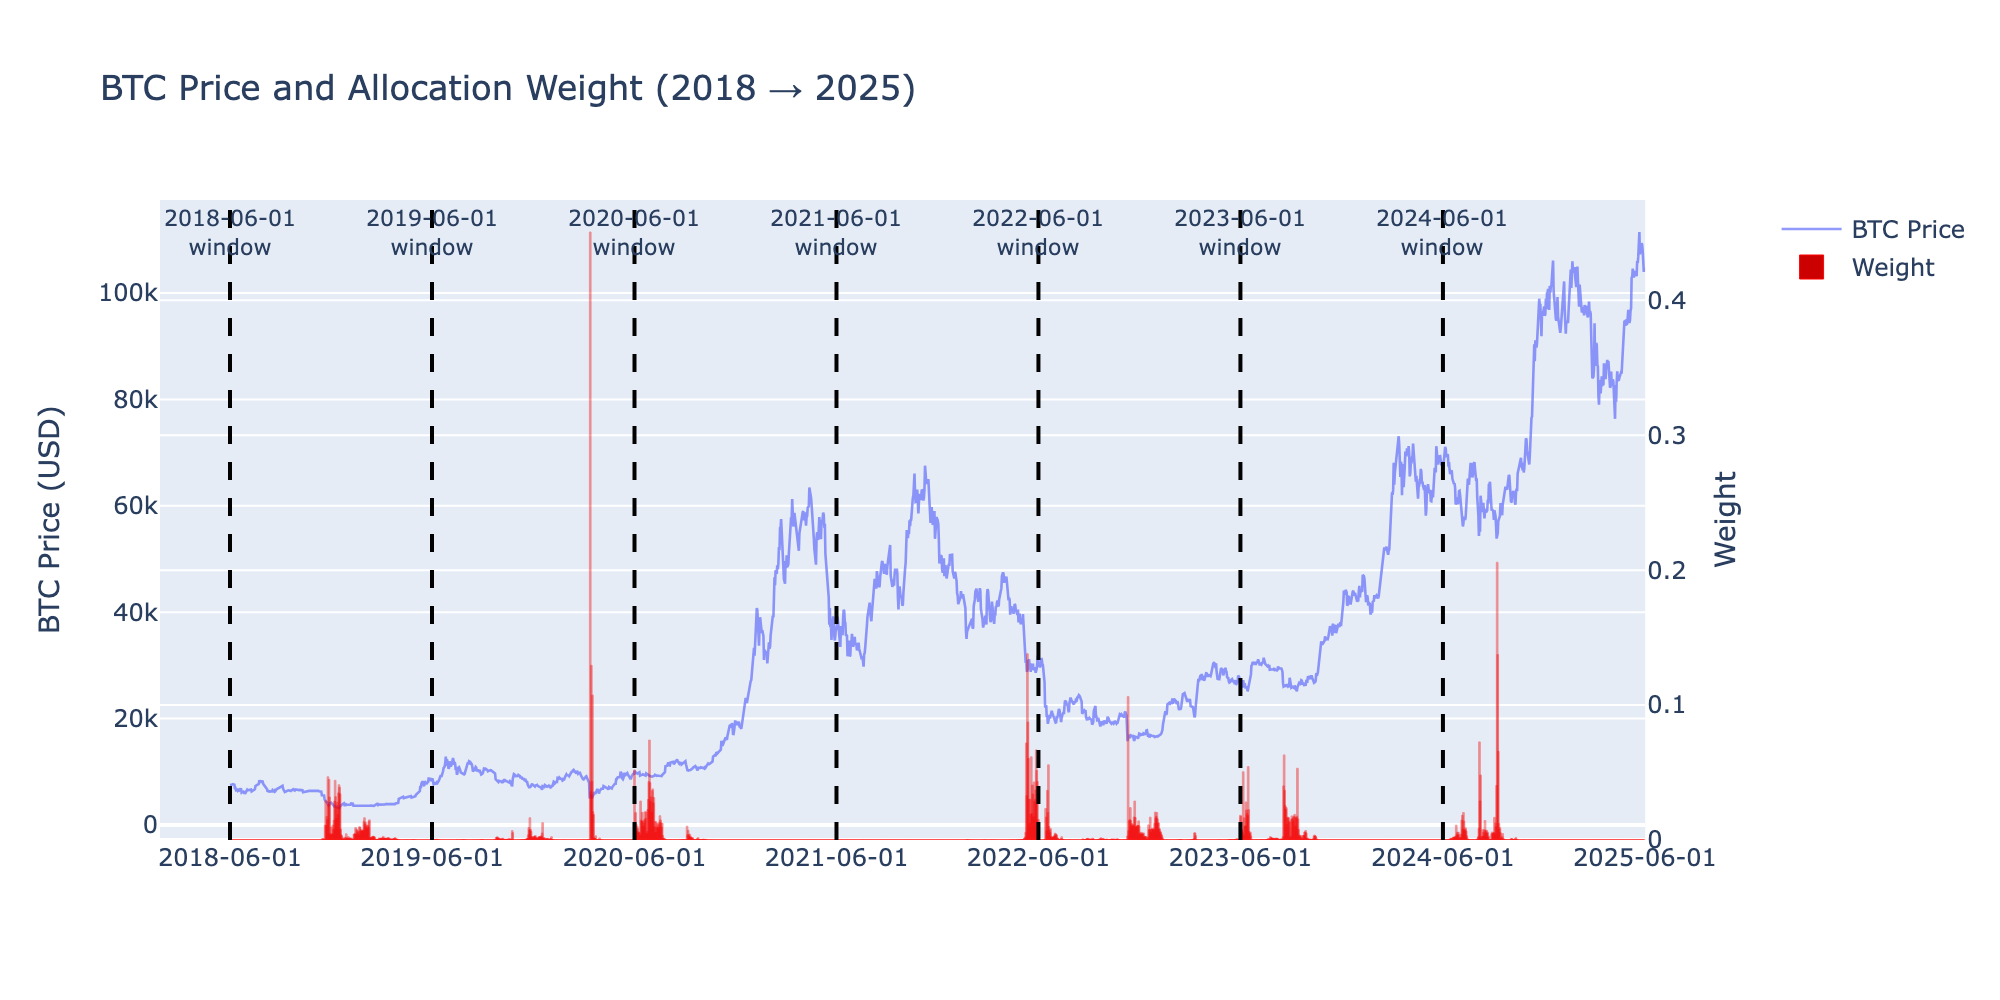

In [113]:
plot_weight_price_across_year(2018, 2025)

---

# 4. Market Understanding Insights  
### Do the dashboard’s market indicators (MA200, MSTR) help investors better understand the market? What additional insights do they provide?

Market indicators in the dashboard — such as MA200 and the MSTR signal — help investors understand the market and serve as fundamental-analysis tools. They also allow investors to incorporate more information into their decision-making while using Dynamic DCA.

## 4.1 Price vs MA200 – Long-Term Trend Understanding  
- **Question answered:**  
  **What does MA200 show about overall market conditions?**    
  **How does dynamic DCA respond to bearish and bullish regime (Price<>MA200)**      
  **Can MA200 integrate into BTC accumulation strategy?**
- Approach:
  - Highlight major historical cycles with bearish and bullish phases
  - Analyze duration of bull/bear regimes
  - Investigate dynamic DCA allocation behavior by market regime
  - Experiment BTC accumulation strategy with MA200
- Key Findings:
  - Opportunities to buy Bitcoin at deep discounts occur far less frequently than opportunities to scale back at high prices in the BTC market.
  - Dynamic DCA naturally buys more during weak market conditions and scales back during strong markets.
  - Using an MA200-based Bitcoin accumulation strategy generally outperforms uniform DCA, but it still falls short compared to the current Dynamic DCA method.

The 200-day moving average (MA200) is the average price over the past 200 days and is widely used to gauge whether the market is overheated or oversold. When price moves far above the MA200, it often signals a bullish environment; when it falls well below, it can indicate a bearish one. The intuition is that MA200 reflects the long-term “fair” or equilibrium level of the market—so a large deviation from this average suggests something unusual is happening, either excessive optimism or excessive pessimism.

### 4.1.1 Major historical cycles with bearish and bullish phases
I define a bullish regime as price being more than 20% above the MA200, and a bearish regime as price being more than 20% below it.

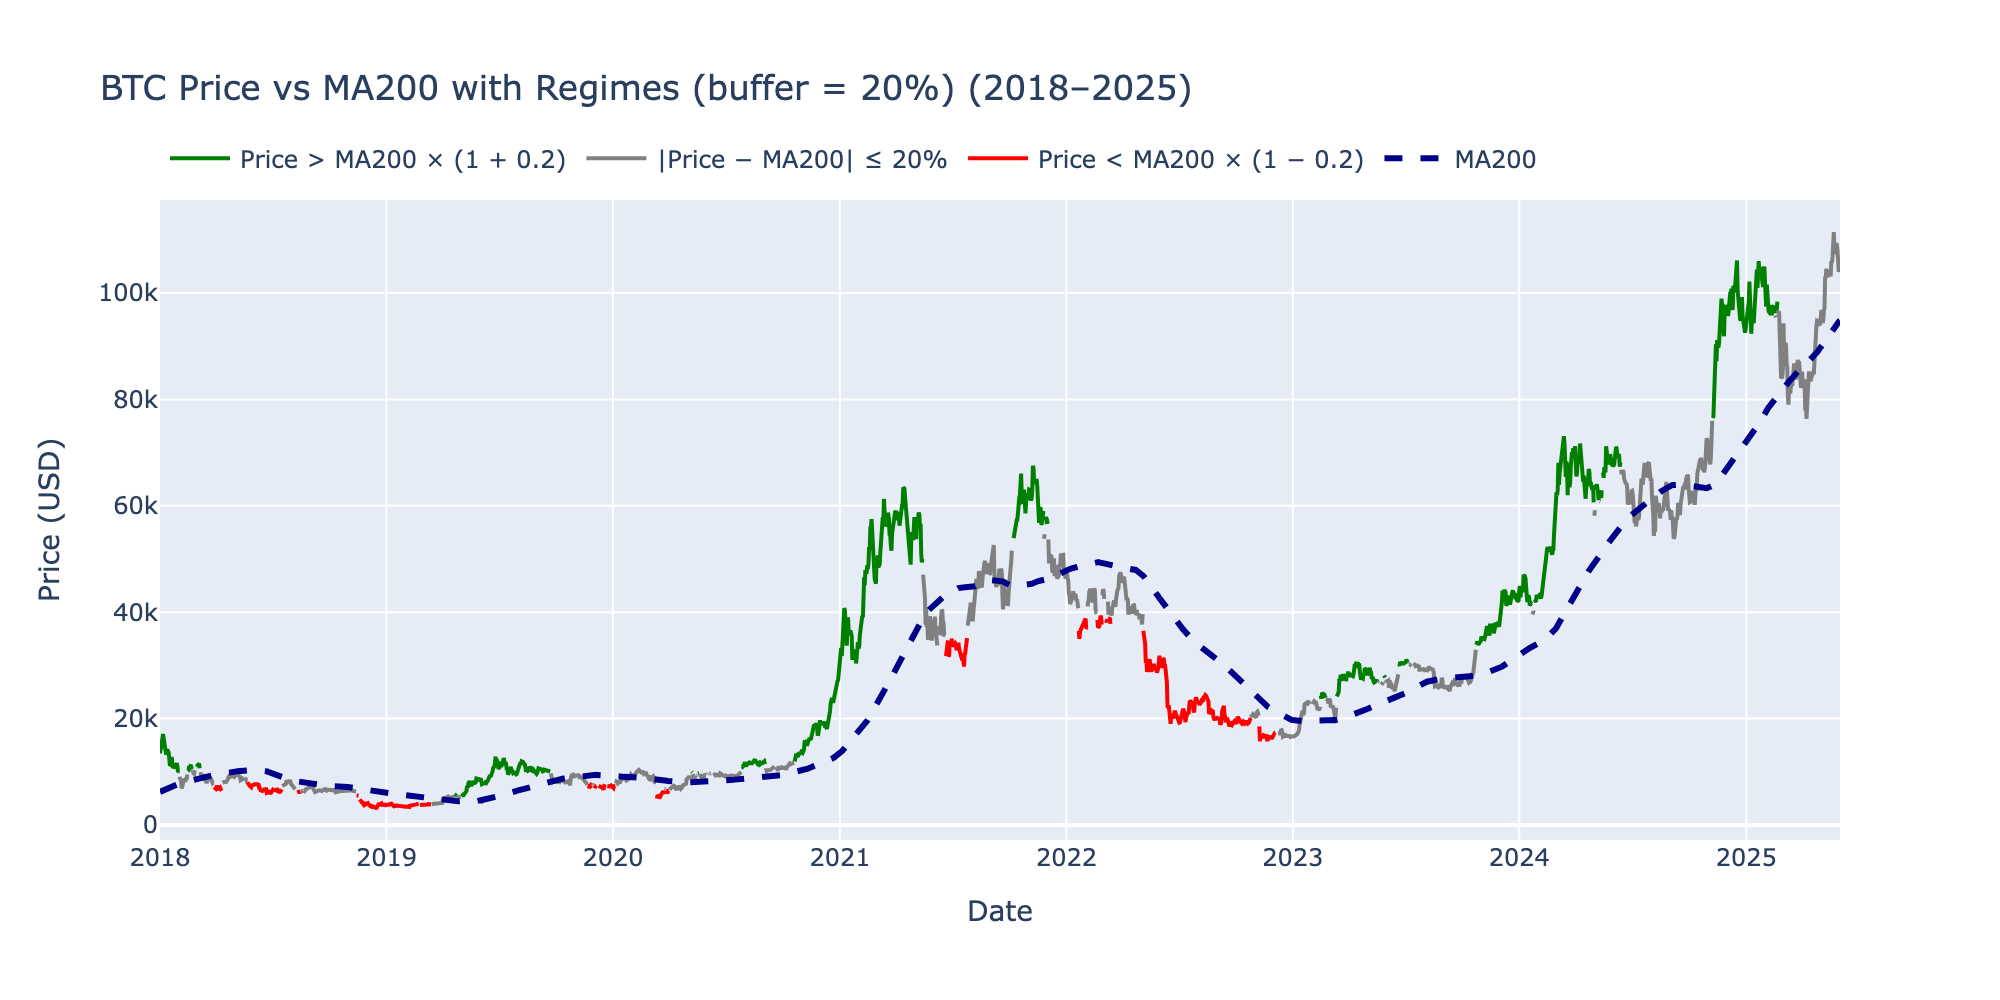

In [114]:
plot_price_vs_ma200(start_year=2018, end_year=2025)

### 4.1.2 Duration of bull/bear regimes
I computed the frequency of bullish and bearish periods from 2011 to 2025, and the results show a clear pattern: Bitcoin has spent significantly more time in bullish conditions than in bearish ones. In other words, BTC has historically stayed above its long-term average far more often than below it.

In [115]:
market_regime_frequency_two_classes()

Regime  Count  Percentage %
0  bullish   2073         40.43
1  bearish    779         15.19

### 4.1.3 Dynamic DCA allocation behavior by market regime
I compare the dynamic DCA daily average allocation under different market regimes (bull, bear, and sideways). From the graph and table, we can clearly see that the average daily allocation is significantly higher in the bear regime than in the sideways and bull regimes, and it is lowest in the bull regime. It suggests that the dyanmic DCA strategy can automatically adjusts its aggressiveness based on the broader market condition: naturally buys more in weak markets and scales back in strong markets

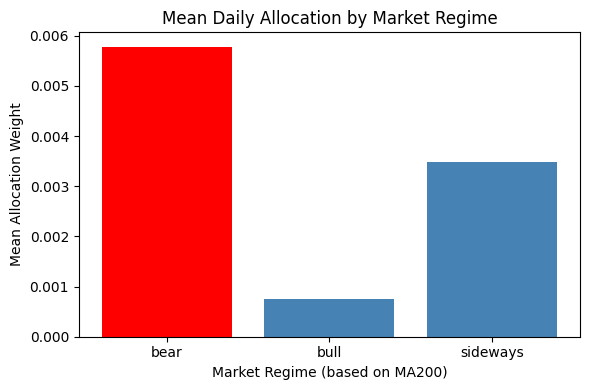

regime  average_daily_weight
0      bear              0.005779
1      bull              0.000755
2  sideways              0.003486

In [116]:
plot_allocation_by_regime(buffer = 0.2) 

### 4.1.4 Experiment BTC accumulation strategy with MA200

1. Start from uniform DCA (baseline weights)
    - First, I initialize daily investment weights using standard uniform DCA, spreading the total budget evenly across all days in the backtest window.
2. Use MA200 as a dynamic adjustment signal      
For each day, I compare the current price to the 200-day moving average (MA200):
    - If price ≥ MA200: 
        - keep the original uniform DCA weight for that day. No adjustment is made in “normal” or overheated conditions.
    - If price < MA200: 
        - Treat this as a potential “dip” and scale up that day’s allocation based on how extreme the discount is
        - Compute a Z-score:
            $$z_{\text{score}} = \frac{\mathrm{MA}_{200} - \text{Price}}{\text{std}_{200}}$$
            - The Z-score measures how many standard deviations the current price sits below its 200-day average.
            - For example, a Z-score of 2.0 means the price is much lower than usual, even after accounting for its typical volatility. A larger Z-score = a deeper, more statistically significant dip.
        - Compute a boosted daily weight:
            $$\text{boosted\_weight} = \text{base\_weight} \cdot (1 + \alpha \cdot z_{\text{score}})$$
            - α (boost_alpha) controls how aggressively we buy the dip.
            - The deeper the dip (higher Z-score), the more we scale up that day’s allocation.
3. Normalize weights back to a valid allocation
    - After adjusting all days (some boosted, others unchanged), I linearly rescale the daily weights so that they sum to 1 (or equivalently, sum to the annual budget).


Over the 1-year rolling windows between 2011 and 2025, the MA200-based accumulation strategy achieves a win rate of $76.13\%$ against uniform DCA, with an average SPD percentile of $67.17\%$. This still falls short of the Dynamic DCA strategy, which reaches a win rate of $99.41\%$ and an average SPD percentile of $89.55\%$.

<img src="data/ma_dca_performance.png" width="70%">

## 4.2 MSTR Purchase Indicator – Institutional Behavior Insight  
- **Question answered:**  
  **What can investors learn from MSTR buying patterns?**     
  **Whether the price tends to rise after an MSTR signal appears?**      
  **Can MA200 integrate into BTC accumulation strategy?**
- Approach:
  - forward-looking percentile
  - Monte Carlo random-timing test
  - one-tailed t-test
  - Integrate MSTR signal into Dynamic DCA
- Key Findings:
  - MSTR signal is more likely to result in buying at relatively lower price points compared to random timing in a month.
  - It is still challenging to integrate MSTR to Dynamic DCA strategy

MicroStrategy is the largest corporate holder of Bitcoin in the United States, so the MSTR signal often serves as a buy signal for some investors for three main reasons:

1. Smart-money signal
  Investors treat MSTR as a sophisticated, research-driven institutional buyer. When MSTR accumulates more BTC, people infer that a “smart” player sees value or has strong conviction, so they follow its lead.
2. Expected price impact
  MSTR typically buys in very large size. These orders can create real upward pressure on BTC’s price, so some traders buy around those events, expecting that MSTR’s demand will help push the market higher.
3. Narrative and sentiment effect
  Each MSTR purchase tends to generate media coverage and social buzz, reinforcing a bullish narrative around Bitcoin. This positive sentiment itself attracts additional buyers and amplifies the impact of the signal.

### 4.2.1 Visualize MSTR’s historical buy points on the Bitcoin price chart.

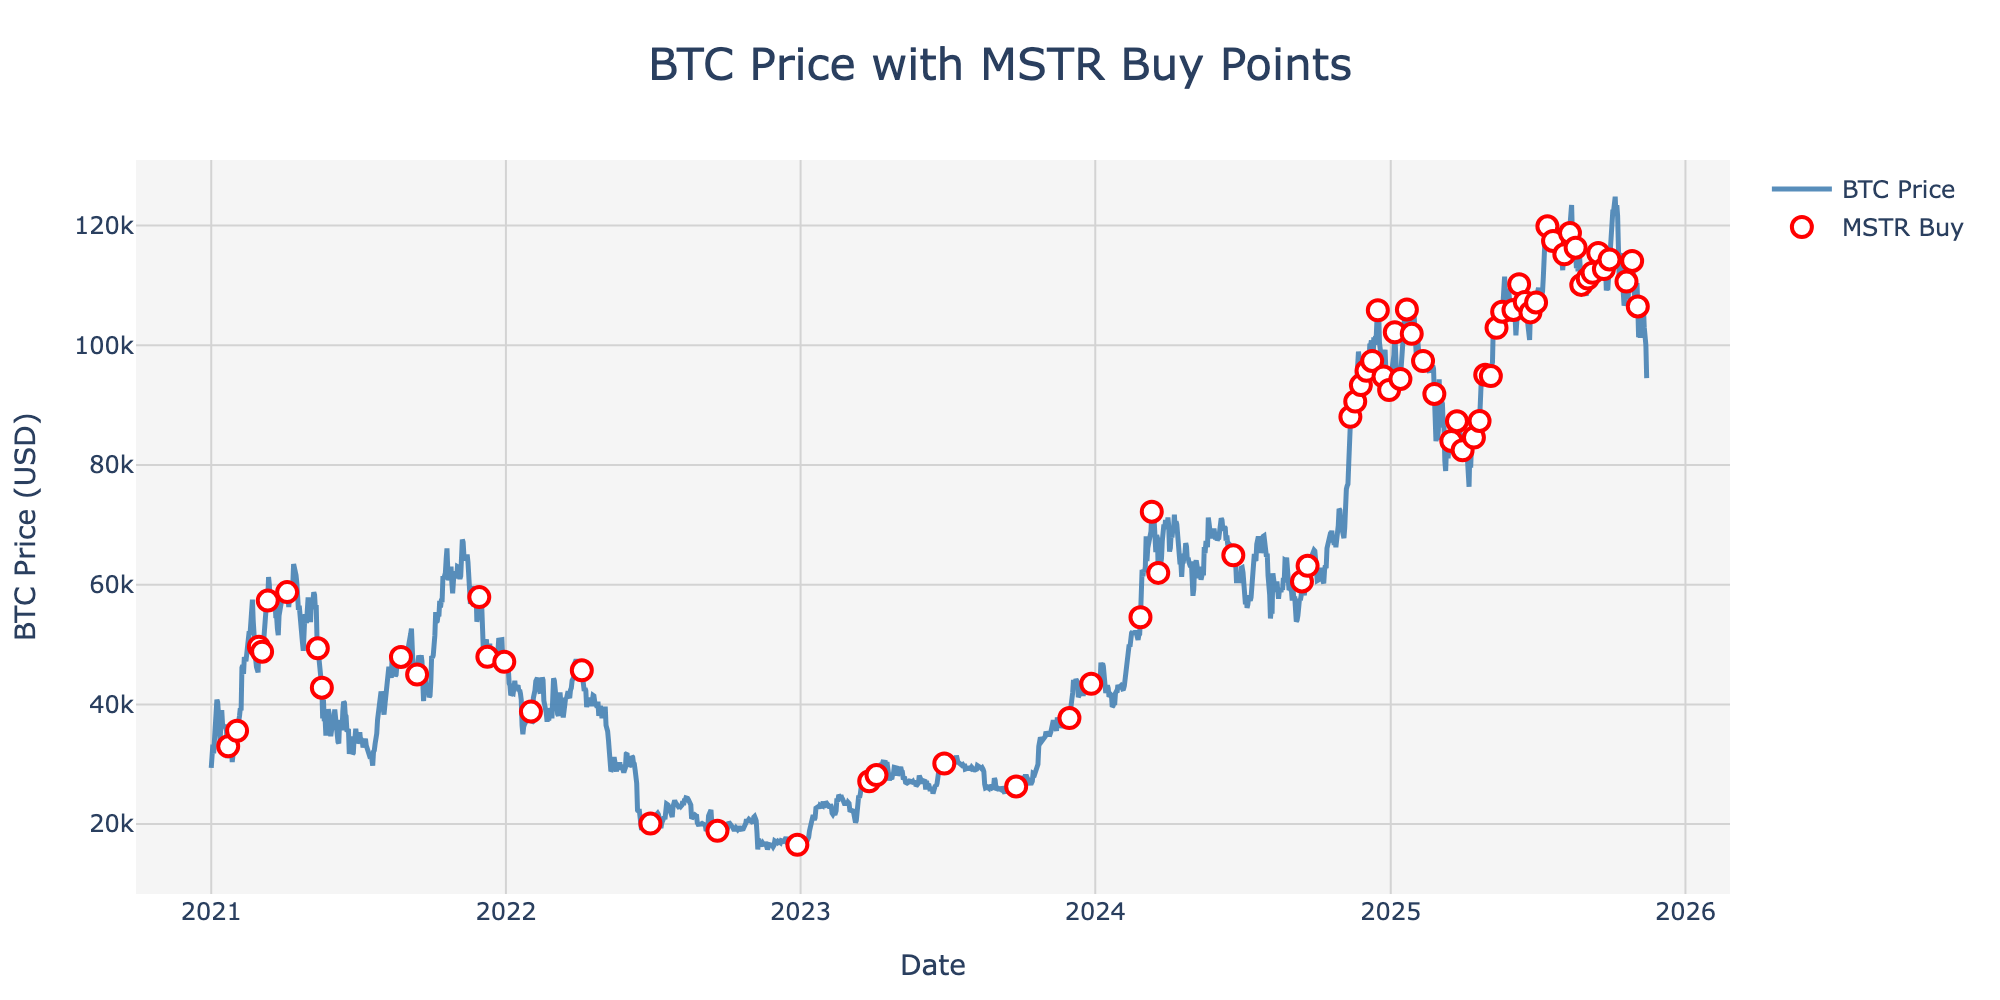

In [117]:
plot_mstr_buy_points()

### 4.2.2 Does MSTR really buy low?

My objective is to examine whether Bitcoin tends to rise meaningfully after MSTR makes a purchase. To do this, I use a **forward-looking percentile** approach. For each MSTR buy date, I extend a window several days into the future and compute the percentile of the purchase-day price within that future price range. I then average these percentiles across all buy events.

- If the **average percentile is high**, it means the purchase-day price is *not low* relative to future prices—in other words, **there is no strong upward movement afterward**.

- If the **average percentile is low**, it indicates the purchase-day price is *low* compared to future prices, meaning **a clear upward trend followed the purchase**.

Since MSTR’s purchase signals may not be immediately reflected in the market, I test multiple forward windows: **7, 30, 90, and 180 days**. These represent different assumptions about how quickly the signal should translate into price movement.

In addition, I establish a baseline using a **Monte Carlo random-timing test**. I randomly sample the same number of timestamps as MSTR’s buy events, compute their average forward-looking percentile, repeat this procedure **1,000 times**, and take the mean. Then, I conduct a **one-tailed t-test** to evaluate whether MSTR’s forward-looking percentiles are significantly lower than the random baseline in any of the four future windows.

If MSTR’s percentiles are significantly lower than random timing, this implies that MSTR tends to buy at prices that are low relative to future market movements—meaning MSTR’s purchases contain **predictive power** and may serve as a **meaningful buy signal**.


I first computed the average forward-looking percentile under the 7-, 30-, 90-, and 180-day windows. The results show that MSTR’s buy prices are not particularly low relative to the prices in the subsequent days.

In [118]:
df_mstr = load_mstr_price()
pct_df = forward_spd_percentiles(df_mstr)
mstr_pct_summary = summarize_forward_percentiles(pct_df)
mstr_pct_summary

horizon_days  mean_percentile  n_events
0             7            56.26        72
1            30            57.40        70
2            90            52.82        65
3           180            51.67        57

Next, I applied a **Monte Carlo random-timing test**. I randomly sample the same number of timestamps as MSTR’s buy events, compute their average forward-looking percentile, repeat this procedure **1,000 times**, and then evaluate the resulting distribution.

In [119]:
rand_pct_df = random_timing_forward_percentiles(df_mstr)
rand_pct_df.describe()

mean_pct_7d  mean_pct_30d  mean_pct_90d  mean_pct_180d
count  1000.000000   1000.000000   1000.000000    1000.000000
mean     51.764041     51.903387     51.708556      53.787177
std       4.423368      3.866529      4.000863       3.944906
min      36.271289     40.706445     39.355851      42.555431
25%      48.654173     49.347530     48.918268      51.170197
50%      51.865458     51.892886     51.727295      53.735252
75%      55.011060     54.498654     54.493096      56.349163
max      63.951874     63.649815     64.040666      64.892181

Next, I visualized the distribution of forward-looking percentiles for the random-timing samples alongside the corresponding values from the MSTR buy events.


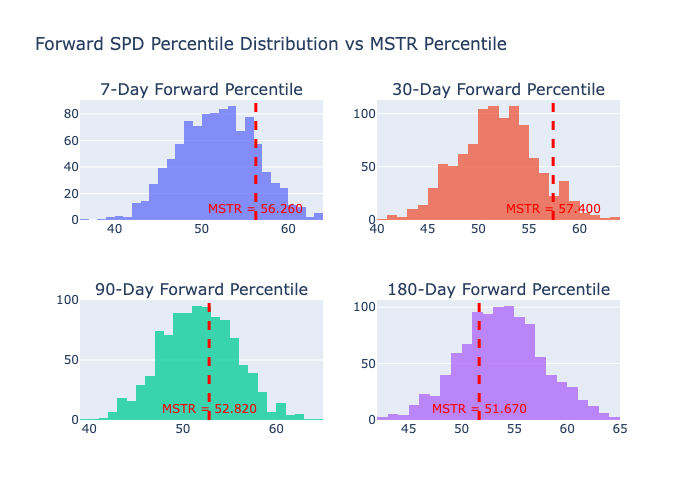

In [120]:
plot_percentile_distributions(rand_pct_df, mstr_pct_summary)

Next, I conduct a **one-tailed t-test** to evaluate whether MSTR’s forward-looking percentiles are significantly lower than the random baseline in any of the four future windows.

The results show that for the **30-day future window**, the p-value is close to 0.05, while the other future windows do not exhibit significant differences. This suggests that when an MSTR buy signal occurs, there is a potential upward trend within the following 30 days. In other words, following the MSTR signal is more likely to result in buying at relatively lower price points compared to random timing in 30 days.


In [121]:
ttest_result = percentile_ttest_mstr_rand(rand_pct_df, mstr_pct_summary)
ttest_result

horizon_days  mstr_mean  rand_mean  std_rand    t_stat  p_value_one_sided
0             7      56.26  51.764041  4.423368  1.016411           0.845160
1            30      57.40  51.903387  3.866529  1.421589           0.922271
2            90      52.82  51.708556  4.000863  0.277801           0.609389
3           180      51.67  53.787177  3.944906 -0.536686           0.295802

### 4.2.3 Multi-layer MSTR signal boost for dynamic DCA

Based on the earlier analysis, MSTR does provide a meaningful buy signal, but using it alone as a standalone strategy is still too weak. So I experimented with combining it with the Dynamic DCA strategy to see whether it can further improve Dynamic DCA’s current performance.
- **Method Overview:**
    1. **Different boost by purchase size:**       
    Grouped the MSTR BTC purchase amounts into three levels using Jenks Natural Breaks. Larger purchase amounts correspond to a larger boost factor. For each event day, the Dynamic DCA weight is multiplied by the assigned boost value based on the cluster level.
    2. **Time-decay boosting:**       
    Added an exponential decay component to account for the time-lagged influence of each MSTR event. For every event occurring at day *tᵢ*, an exponential decay curve is formed. This means that days immediately after an event also receive a boosted weight. The effect gradually decreases as the distance from the event day increases, reflecting the assumption that an MSTR purchase may influence several subsequent days but with diminishing strength over time. The decay parameter τ is tested with values **20~120 days** to evaluate different decay speeds.
    $$
    f(d) = 1 + \sum_{t_i \le d} (boost_i - 1) e^{-(d - t_i)/\tau}
    $$
    3. **Limit boost cap:**      
    Used the boost cap to limit the maximum amplification applied to Dynamic DCA weights, regardless of the cluster-based boost value or the exponential decay contribution.
    4. **Suppression when the market is hot:**      
    Added a compatibility suppression mechanism to avoid conflicting signals. For example, situations where the price z-score is very high (expensive) but the MSTR event would otherwise boost the allocation. This suppression ensures that price-based overvaluation signals can override or moderate the MSTR-driven boost.\
    Defined a smooth-maximum (softmax-style) overheating indicator across three windows (30, 90, 180 days). The final effective boost is scaled by this suppression factor to ensure consistency between price signals and MSTR-based boosts. If $ z_{\text{sup}} $ exceeds the threshold $z_{\text{clip}} = 3$, the boost is effectively disabled. In other words, once $ z_{\text{sup}} > 3 $, no additional MSTR boost should be applied.

    $$
    z_{\text{sup}} = 
    \max\left(0,\;
    T \cdot \log\left(
    \frac{e^{z_{30}/T} + e^{z_{90}/T} + e^{z_{180}/T}}{3}
    \right)\right)
    $$


    $$
    \text{supp} = \max\left(0,\; 1 - \frac{z_{\text{clip}}}{z_{\text{sup}}} \right)
    $$


    $$
    z_{\text{clip}} = 3.0000
    $$
- **Performance:**     
    - Average SPD Percentile / Win rate: 82.9% / 100%
    - The average SPD percentile is only 0.4 percentage points higher than the original Dynamic DCA strategy, and the win rate improves by just 0.6 percentage points.
- **Concusion:**     
    The improvement is extremely limited — only a small gain — and these results were obtained after extensive parameter tuning. Because of that, it’s difficult to conclude that the MSTR signal genuinely enhances the current Dynamic DCA strategy in a robust or reliable way. I suspect a few possible reasons:
    1. The effect of MSTR’s timing signal may already be implicitly captured by the Dynamic DCA strategy, so adding it on top provides little incremental benefit.
    2. The MSTR signal is likely a lagging indicator. The information comes from 8-K filings, and those reports are not published immediately after MSTR buys BTC. They are often delayed by several days, during which the market may have already priced in the information.
    3. The market reaction time to MSTR purchases is inconsistent. Sometimes the effect is long, sometimes short, making it difficult for a rule-based quantitative strategy to capture the behavior in a stable way. This makes MSTR unsuitable as a rigid timing signal.
    4. MSTR’s motivation for purchasing BTC may not always reflect bullish sentiment. Some purchases may be driven by treasury strategy, balance-sheet management, or other internal considerations, so they do not always represent a clean buy signal.

---

# 5. Limitations & Future Improvements  
- **1-Year-Window Optimization Constraint:**       
The strategy only optimize the performance under 1 year-window size. It does not guarantee optimal Bitcoin accumulation when the investment horizon is extended (e.g., two years or longer) or shortened.
- **Limitations of Using Sortino for Accumulation Strategies:**      
The Sortino ratio requires downside returns—values below 0—because it measures return per unit of downside risk. However, in our setting, daily return is defined using $\Delta \text{BTC}$: the strategy only accumulates Bitcoin and never sells, so this metric never takes negative values. As a result, there are no downside observations, and the Sortino ratio is neither well-defined nor informative here.    
</br>
More importantly, this kind of risk metric cannot distinguish whether high volatility comes from concentrating purchases at attractive low prices or from mistakenly loading up at high prices. When investors see high volatility together with a low Sharpe ratio, they may simply conclude that the strategy is “too risky,” without recognizing that some of this volatility may actually reflect desirable, aggressive buying at local lows.     
</br>
For future work on accumulation strategies, it would be useful to design risk measures that explicitly capture where along the price distribution the strategy concentrates its purchases—penalizing heavy allocations near local peaks and treating concentration near local troughs as favorable. Such a measure could serve as a modified Sortino-type ratio tailored to accumulation-only strategies.
- **Price Returns Are Not an Appropriate Metric:**       
Traditional return metrics are designed for “buy–hold–sell” strategies, where an investor commits capital to an asset, waits for the price to move, and then exits.      
</br>
In our case, the objective is fundamentally different: the strategy aims to accumulate as many BTC units as possible through buy-only behavior, with no selling. If we instead evaluate performance using USD-based returns, the signal becomes dominated by Bitcoin’s price path rather than the allocation logic. BTC can rally and make USD returns look strong even on days when the strategy barely buys anything. In other words, price swings mainly reflect market movement, not how effectively the strategy accumulates Bitcoin. As a result, USD returns are not a meaningful way to evaluate an allocation algorithm whose primary goal is BTC accumulation.

- **No Transaction Costs Assumed:**      
The strategy assumes zero transaction costs (e.g., trading fees, spreads, or slippage). In other words, every dollar committed is fully converted into Bitcoin without any frictional losses

# 6. Furture EDA Work
- **Parameter Interpretability:**      
To interpret the learned α and β parameters in economic terms, checking whether they align with domain knowledge or reveal unexpected behaviors that point to new insights about market timing and allocation.
- **Multi-Scale Backtesting for Buy-the-Dip Accuracy:**      
Backtest the strategy across different time horizons (both multi-year and sub-one-year) to see whether it consistently buys at local low-price regions.
- **Multi-Horizon Optimization:**     
Train the model to maximize BTC accumulation under multiple window lengths (e.g., 6-month, 1-year, 2-year), and explore whether a unified strategy can jointly integrate and perform well across these different horizons.  